In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
num_clusters = 5

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=num_clusters)

nsamples, nx, ny , nz = x_train.shape
x_train_copy = x_train.reshape((nsamples,nx*ny*nz))

model.fit(x_train_copy)
predictions = model.predict(x_train_copy)

In [ ]:
# num_clusters = 3
x_test_clusters = [[] for _ in range(num_clusters)]
x_train_clusters = [[] for _ in range(num_clusters)]

for x in x_train:
  nx,ny,nz = x.shape
  # print(x.shape)
  x_copy = x.reshape((1, nx*ny*nz))
  clus = model.predict(x_copy)[0]
  x_train_clusters[clus].append(x)

for x in x_test:
  nx,ny,nz = x.shape
  x_copy = x.reshape((1, nx*ny*nz))
  clus = model.predict(x_copy)[0]
  x_test_clusters[clus].append(x)


In [ ]:
x_clusters = [np.concatenate((x_train_clusters[clus], x_test_clusters[clus])) for clus in range(num_clusters)]

In [ ]:
len(x_train_clusters)
sm=0
for x in x_clusters:
  print(len(x))
  sm+=len(x)

# print(sm)

11422
12575
7614
14213
14176


In [ ]:
!pip install torch==1.4.0 torchvision==0.5.0

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import make_grid
import torchvision.utils as vutils
import matplotlib.animation as animation
from IPython.display import HTML

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import copy
import time
import cv2 as cv
from tqdm import tqdm_notebook as tqdm
import matplotlib.image as mpimg

import torchvision.transforms.functional as TF

In [ ]:
print(torch.__version__)

1.4.0


Starting Training Loop...
[0/9][0/9137]	Loss_D: 1.3862	Loss_G: 2.8769	Loss_E: 2.8870	D(x): 0.4998	D(G(z)): 0.4997 / 0.5586


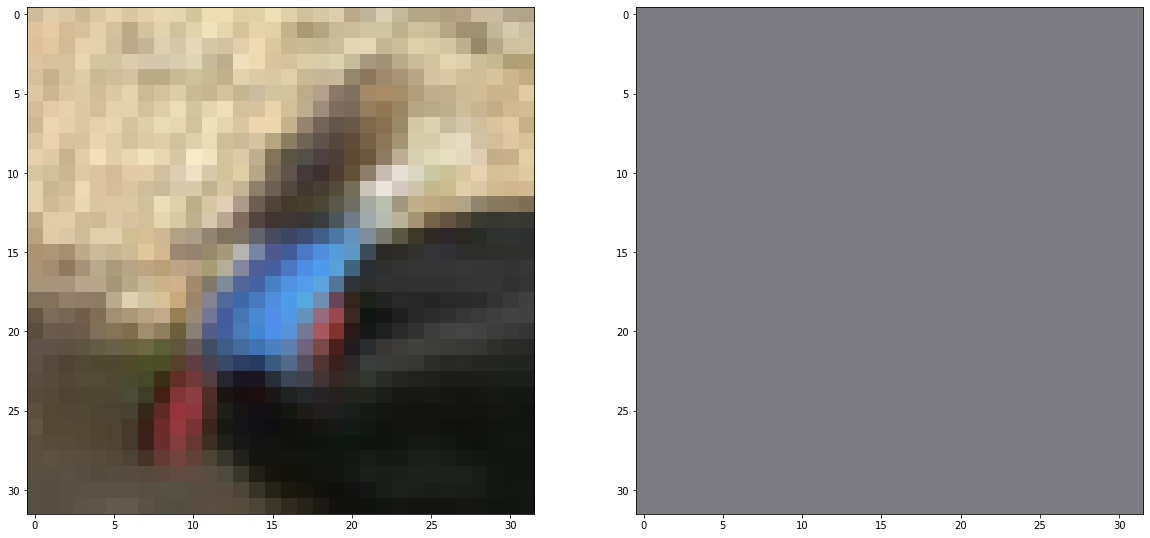

[0/9][2000/9137]	Loss_D: 1.3032	Loss_G: 1.3798	Loss_E: 1.3802	D(x): 0.5550	D(G(z)): 0.4989 / 0.5138


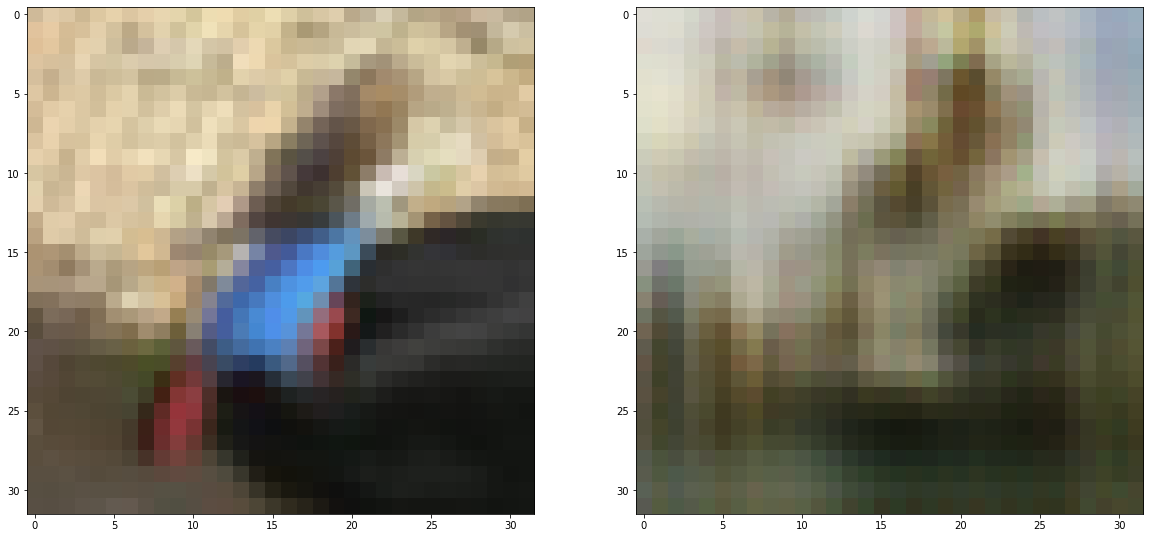

[0/9][4000/9137]	Loss_D: 1.3748	Loss_G: 1.5171	Loss_E: 1.4753	D(x): 0.6155	D(G(z)): 0.5821 / 0.5807


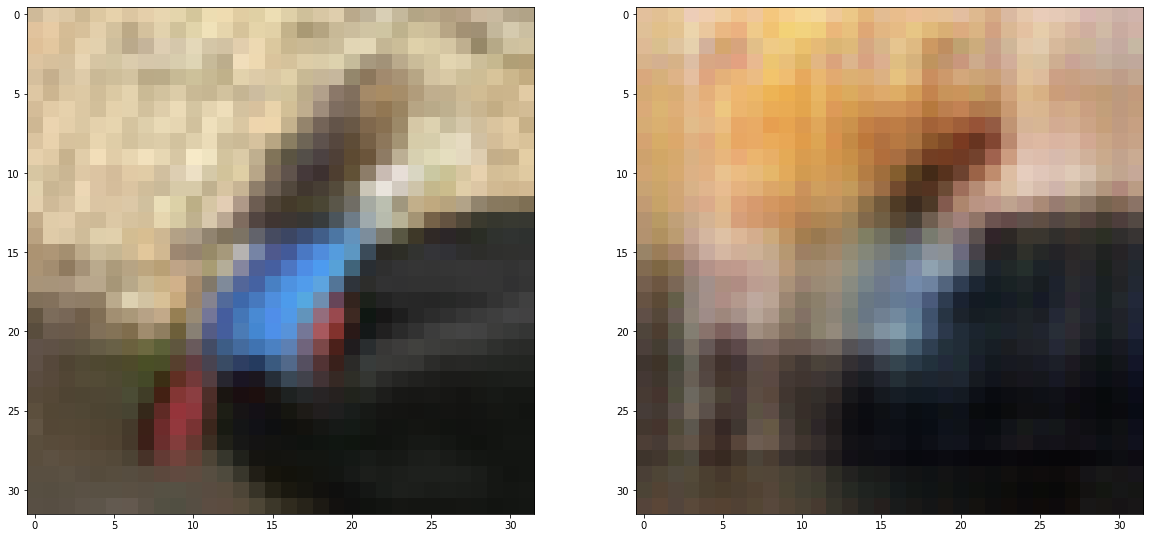

[0/9][6000/9137]	Loss_D: 1.5423	Loss_G: 1.4093	Loss_E: 1.3650	D(x): 0.4455	D(G(z)): 0.5236 / 0.4586


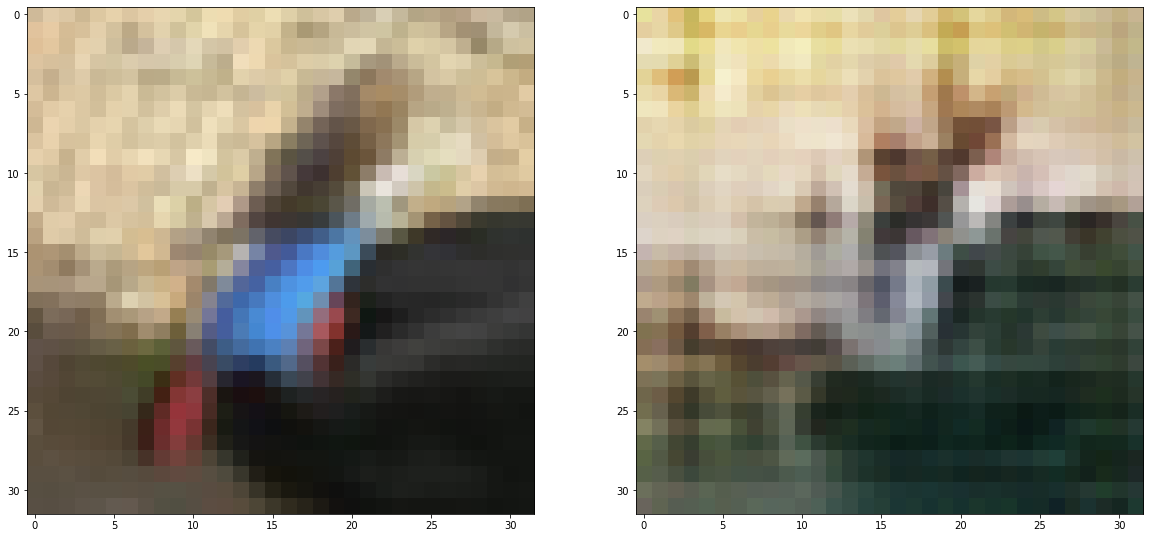

[0/9][8000/9137]	Loss_D: 1.1082	Loss_G: 1.3207	Loss_E: 1.3434	D(x): 0.6696	D(G(z)): 0.5049 / 0.5135


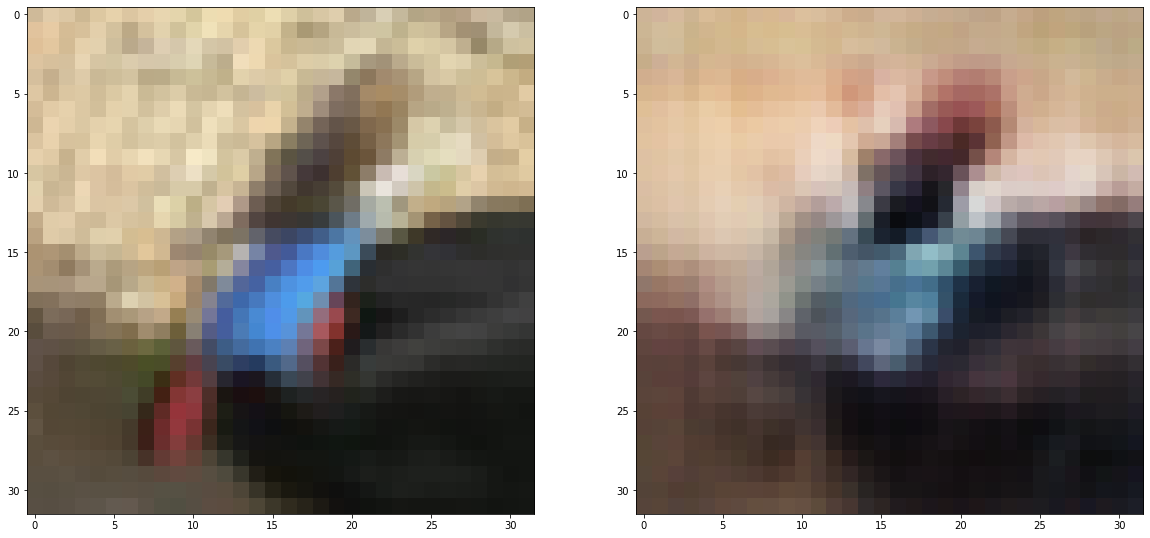

[1/9][0/9137]	Loss_D: 1.3689	Loss_G: 1.0872	Loss_E: 1.0580	D(x): 0.5004	D(G(z)): 0.4895 / 0.4771


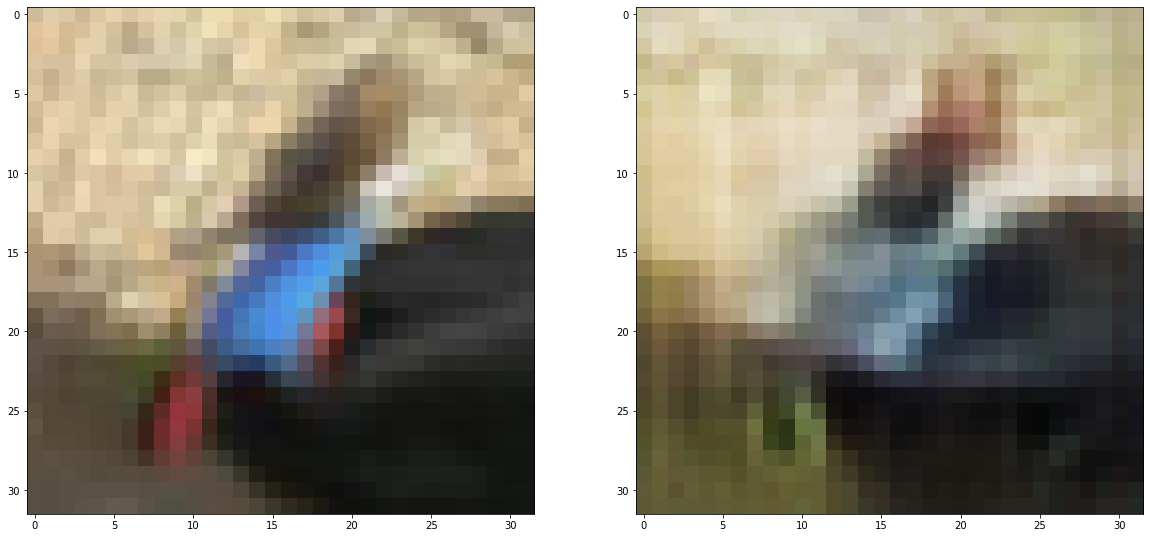

[1/9][2000/9137]	Loss_D: 1.3501	Loss_G: 1.2609	Loss_E: 1.2837	D(x): 0.4924	D(G(z)): 0.4697 / 0.4916


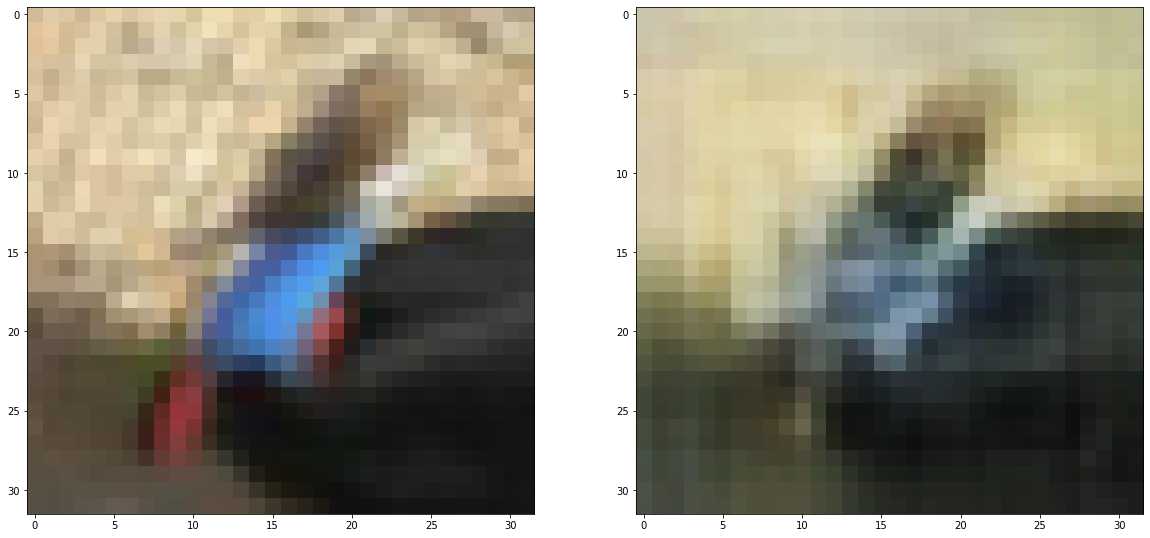

[1/9][4000/9137]	Loss_D: 1.3752	Loss_G: 1.2719	Loss_E: 1.2952	D(x): 0.5709	D(G(z)): 0.5678 / 0.5311


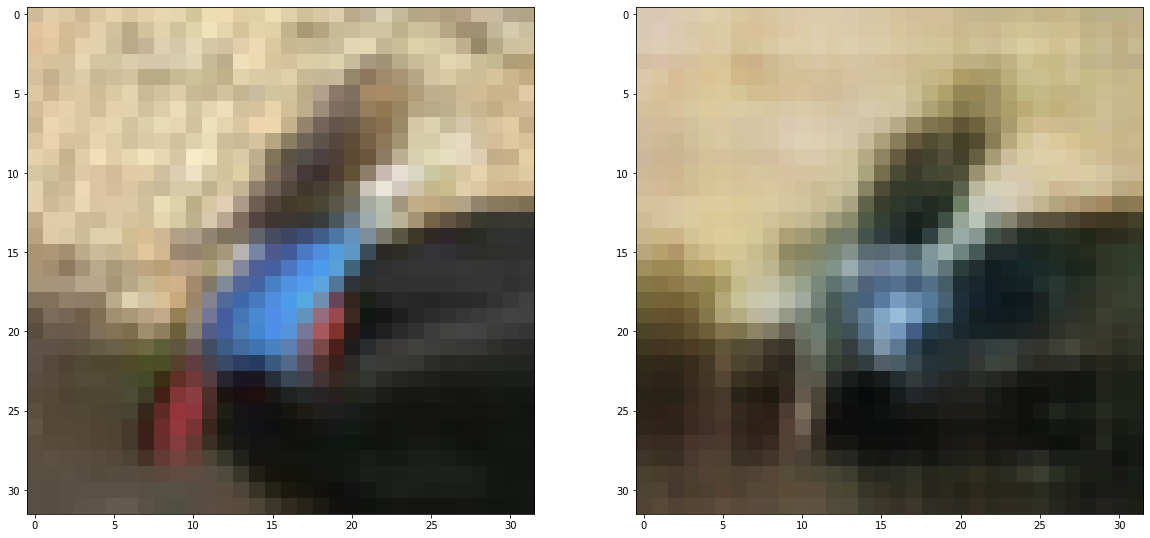

[1/9][6000/9137]	Loss_D: 1.3821	Loss_G: 1.1736	Loss_E: 1.1583	D(x): 0.4867	D(G(z)): 0.4864 / 0.4723


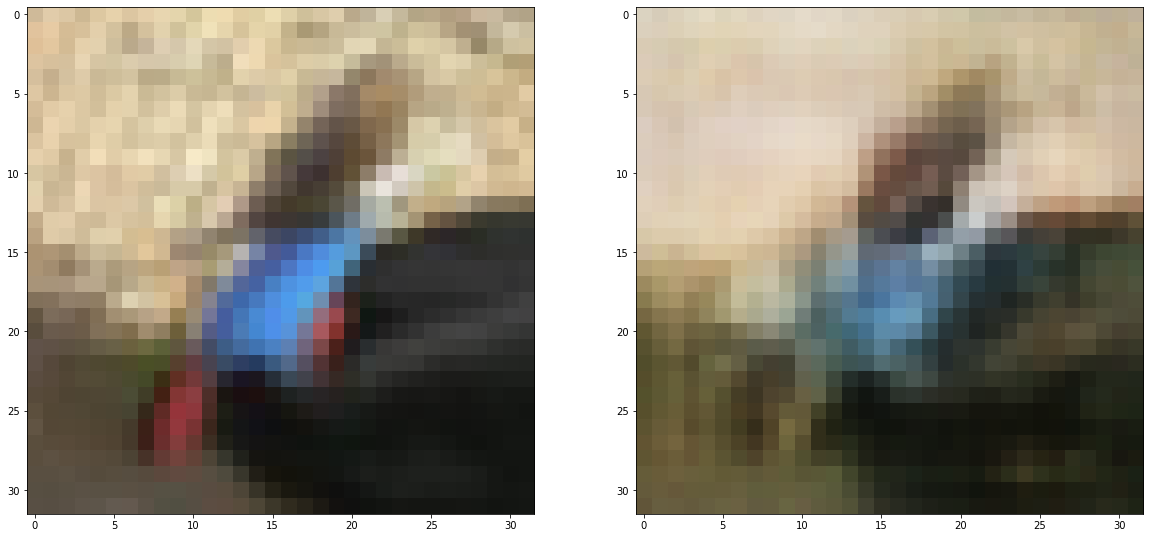

[1/9][8000/9137]	Loss_D: 1.3843	Loss_G: 1.2325	Loss_E: 1.2342	D(x): 0.4839	D(G(z)): 0.4786 / 0.4804


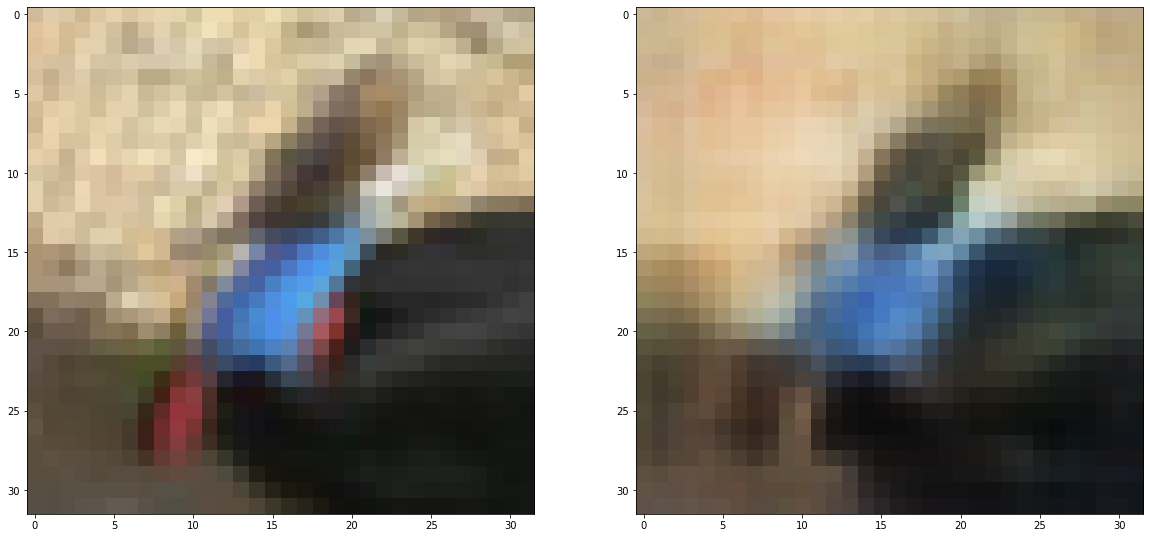

[2/9][0/9137]	Loss_D: 1.3834	Loss_G: 1.0287	Loss_E: 1.0252	D(x): 0.4905	D(G(z)): 0.4857 / 0.4885


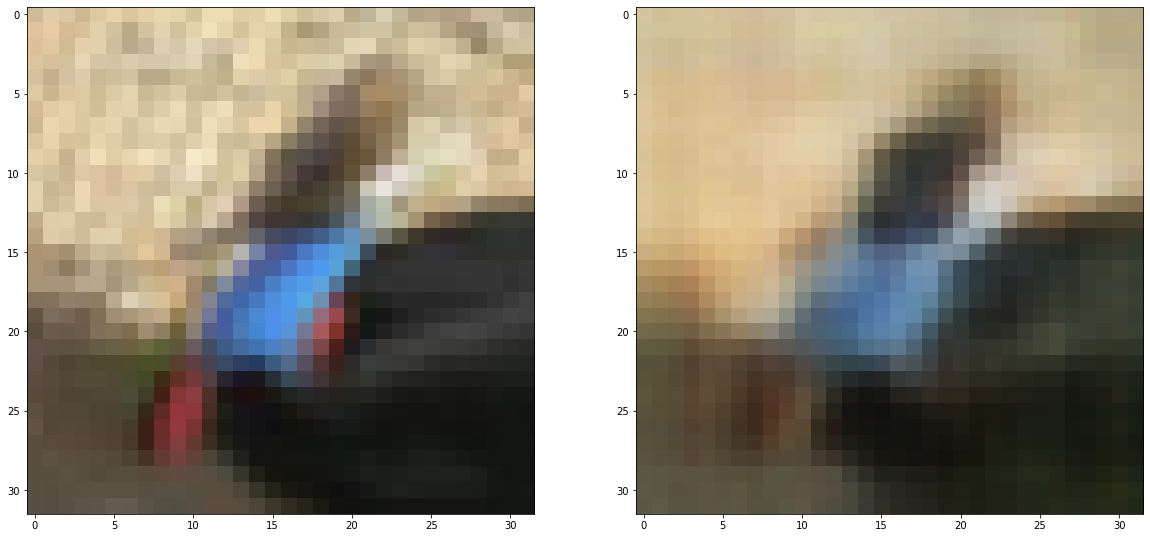

[2/9][2000/9137]	Loss_D: 1.3330	Loss_G: 1.0844	Loss_E: 1.1281	D(x): 0.5181	D(G(z)): 0.4846 / 0.5328


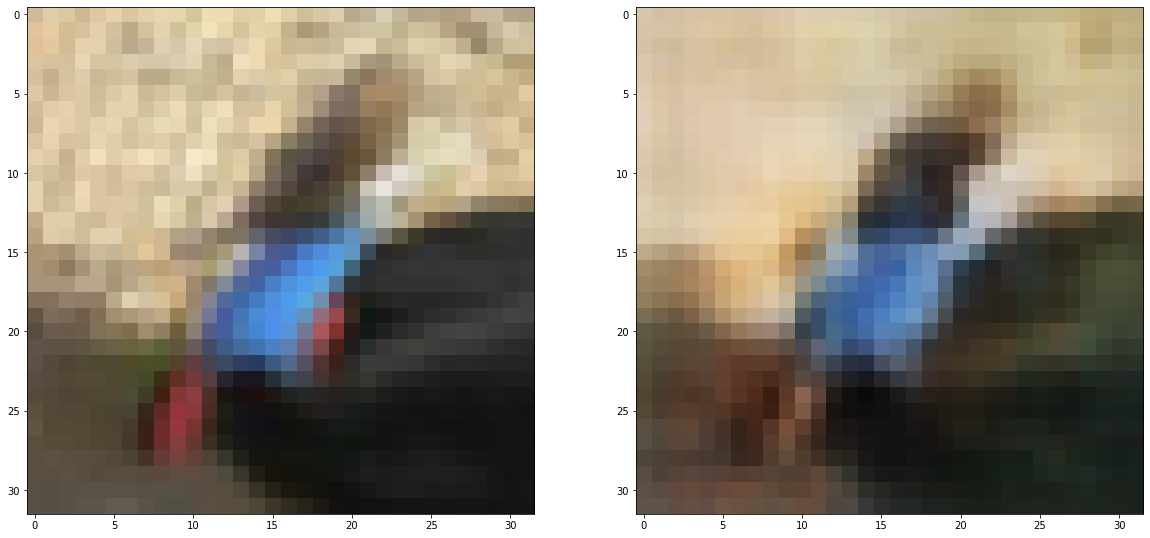

[2/9][4000/9137]	Loss_D: 1.3921	Loss_G: 1.2667	Loss_E: 1.2680	D(x): 0.4673	D(G(z)): 0.4673 / 0.4686


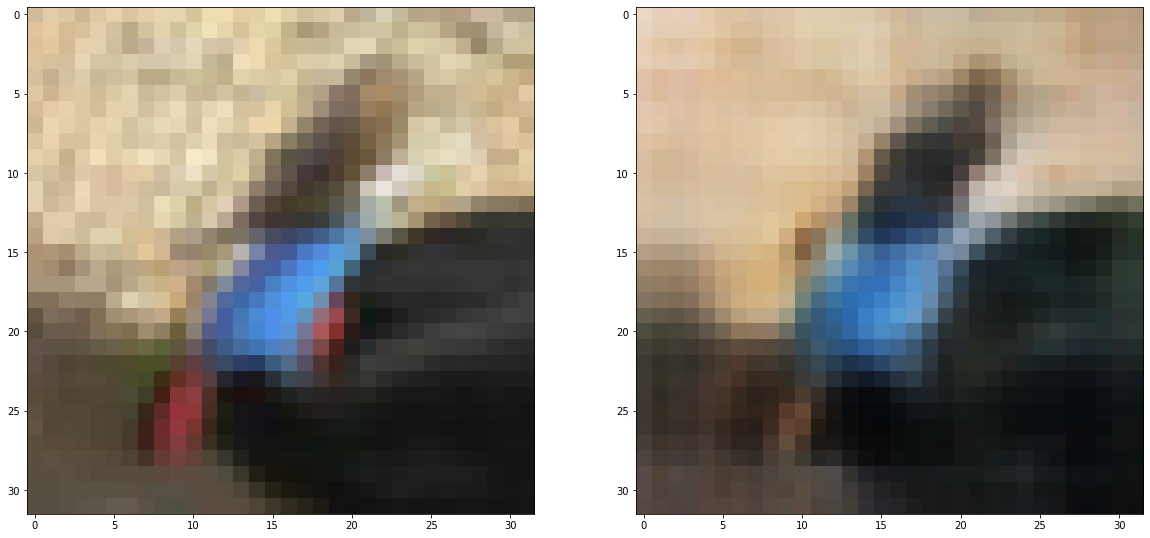

[2/9][6000/9137]	Loss_D: 1.3264	Loss_G: 0.9468	Loss_E: 0.9684	D(x): 0.5282	D(G(z)): 0.4953 / 0.5250


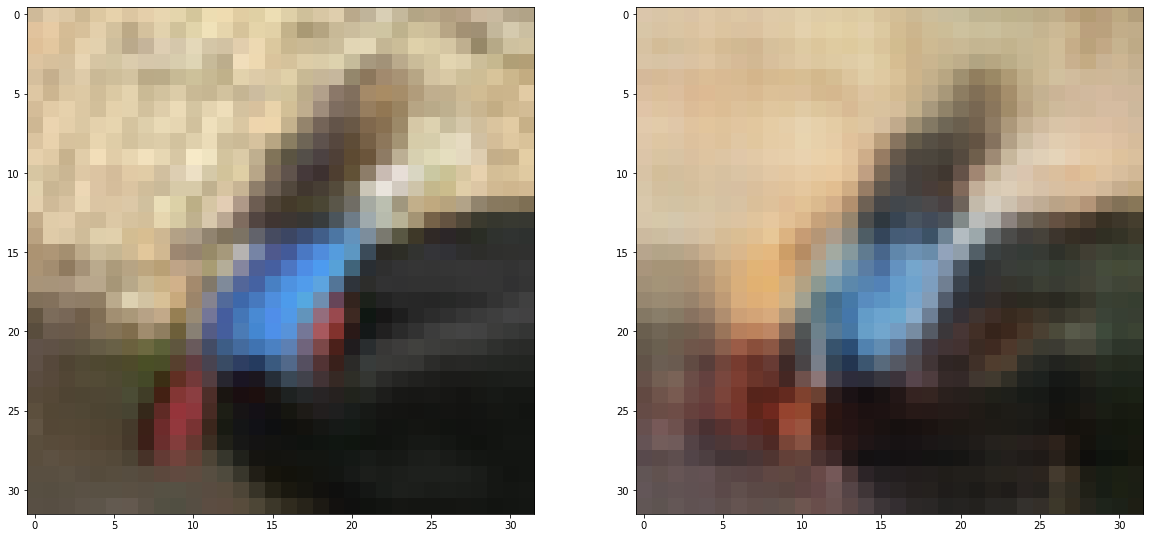

[2/9][8000/9137]	Loss_D: 1.3738	Loss_G: 1.2417	Loss_E: 1.2394	D(x): 0.4912	D(G(z)): 0.4838 / 0.4873


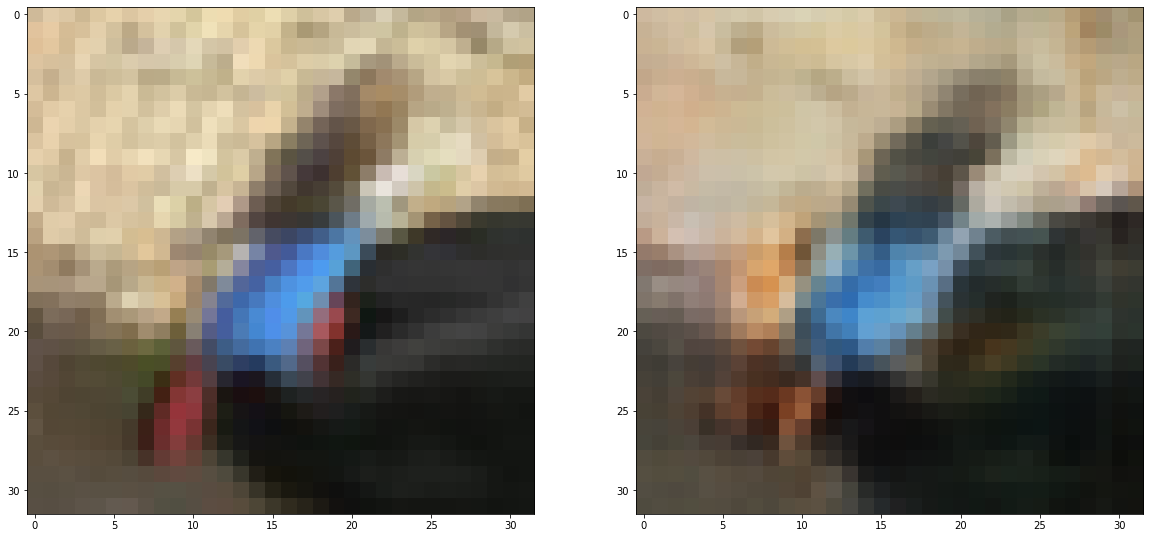

[3/9][0/9137]	Loss_D: 1.4143	Loss_G: 1.0103	Loss_E: 1.0367	D(x): 0.4683	D(G(z)): 0.4841 / 0.5017


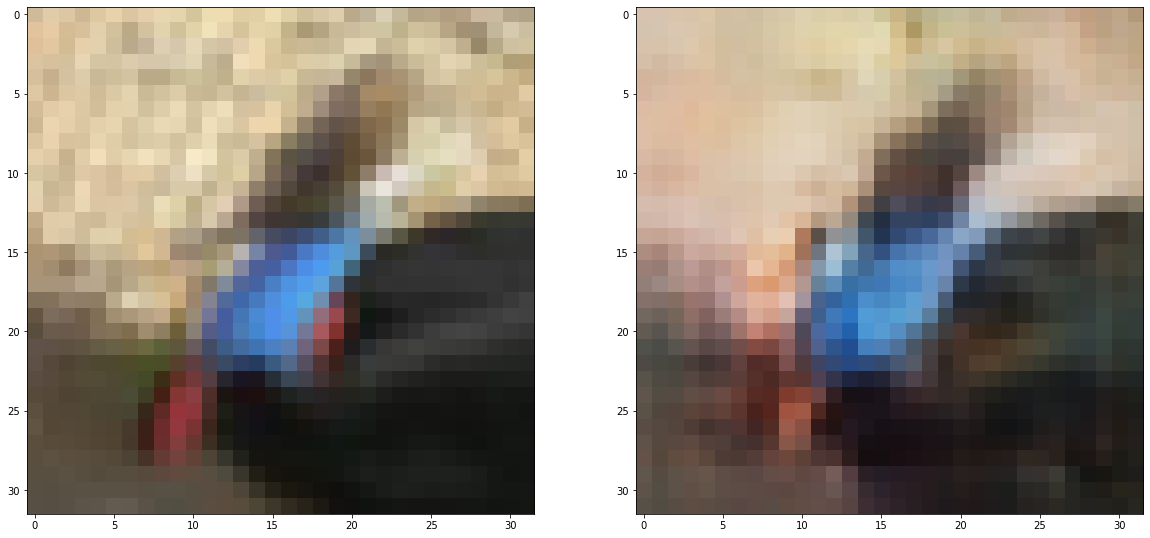

[3/9][2000/9137]	Loss_D: 1.3370	Loss_G: 1.1012	Loss_E: 1.1131	D(x): 0.5344	D(G(z)): 0.5039 / 0.5207


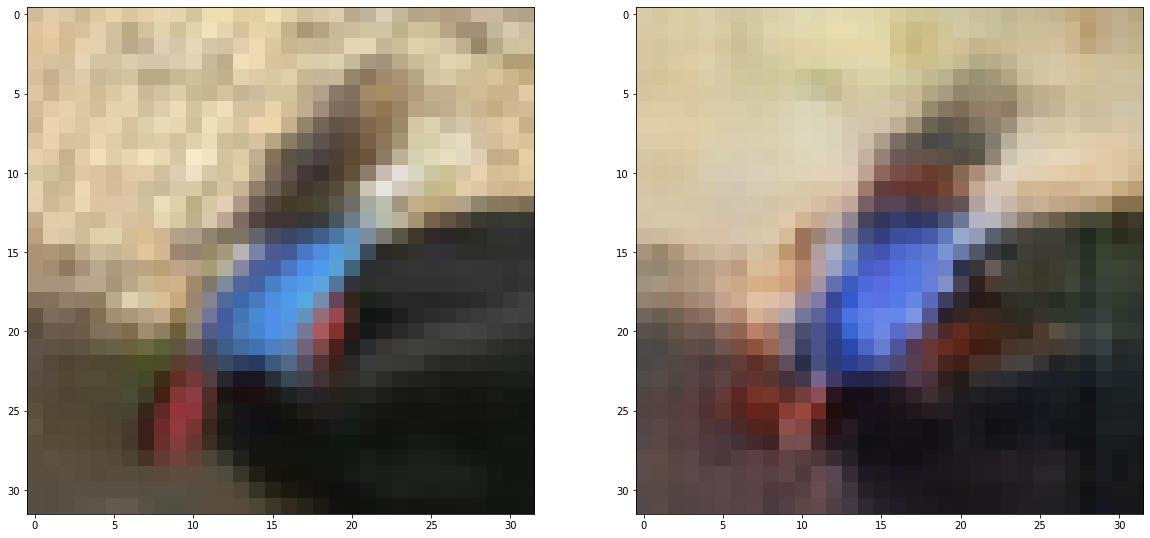

[3/9][4000/9137]	Loss_D: 1.3946	Loss_G: 1.1493	Loss_E: 1.1283	D(x): 0.4905	D(G(z)): 0.4922 / 0.4891


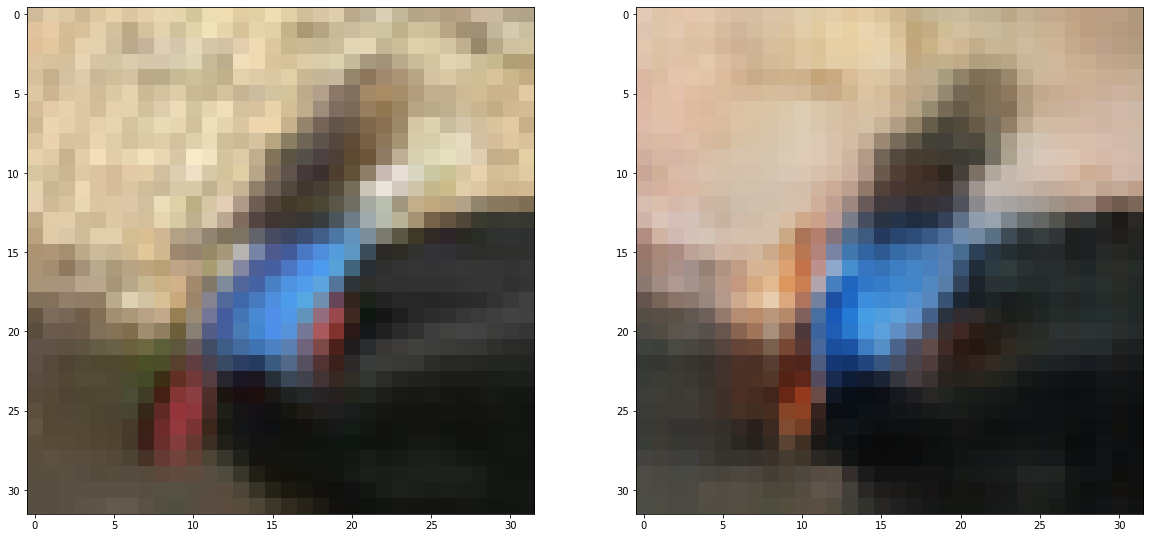

[3/9][6000/9137]	Loss_D: 1.3921	Loss_G: 1.0354	Loss_E: 1.0382	D(x): 0.4769	D(G(z)): 0.4763 / 0.4770


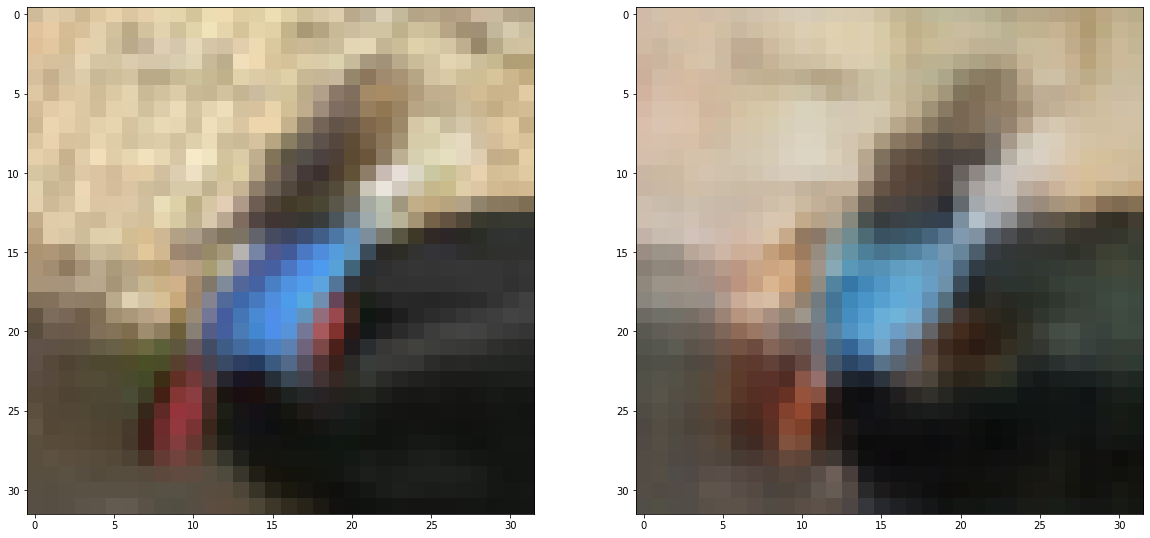

[3/9][8000/9137]	Loss_D: 1.3425	Loss_G: 1.1819	Loss_E: 1.2010	D(x): 0.5239	D(G(z)): 0.4923 / 0.5092


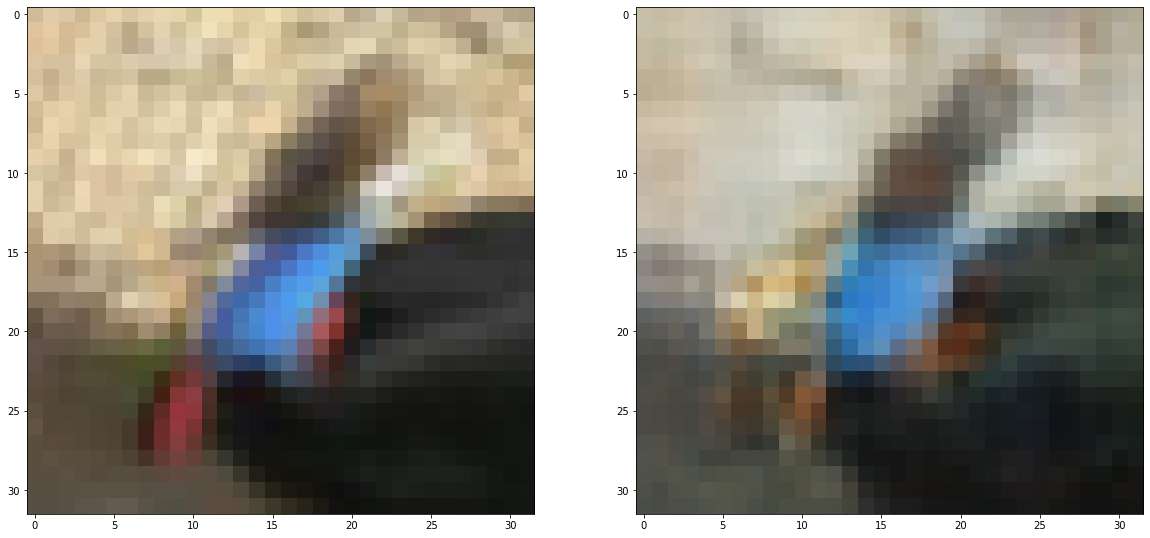

[4/9][0/9137]	Loss_D: 1.3860	Loss_G: 0.9991	Loss_E: 0.9717	D(x): 0.4791	D(G(z)): 0.4823 / 0.4760


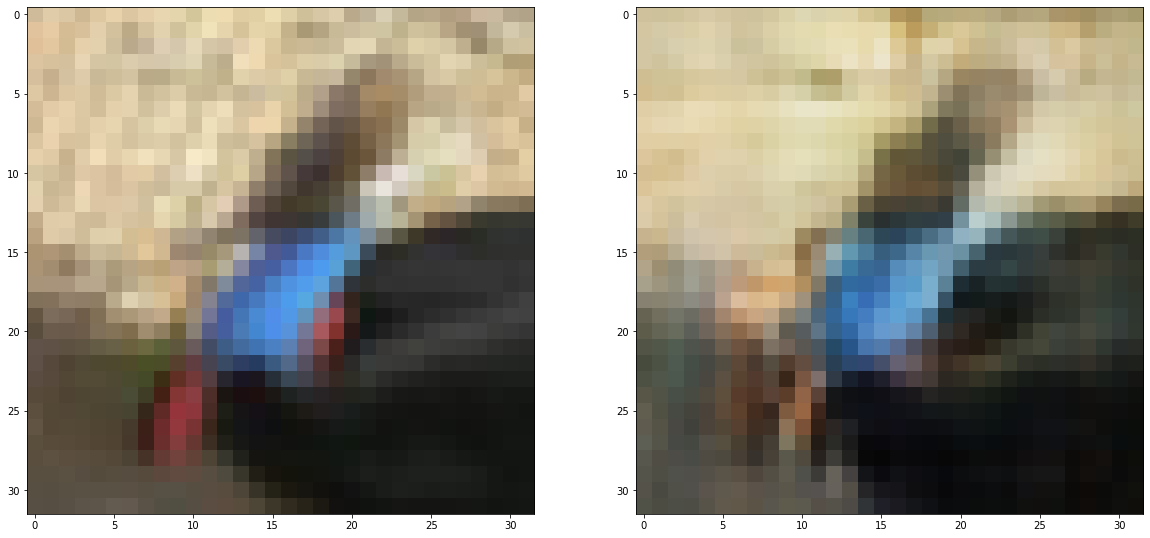

[4/9][2000/9137]	Loss_D: 1.3499	Loss_G: 1.0782	Loss_E: 1.0734	D(x): 0.5298	D(G(z)): 0.5126 / 0.5030


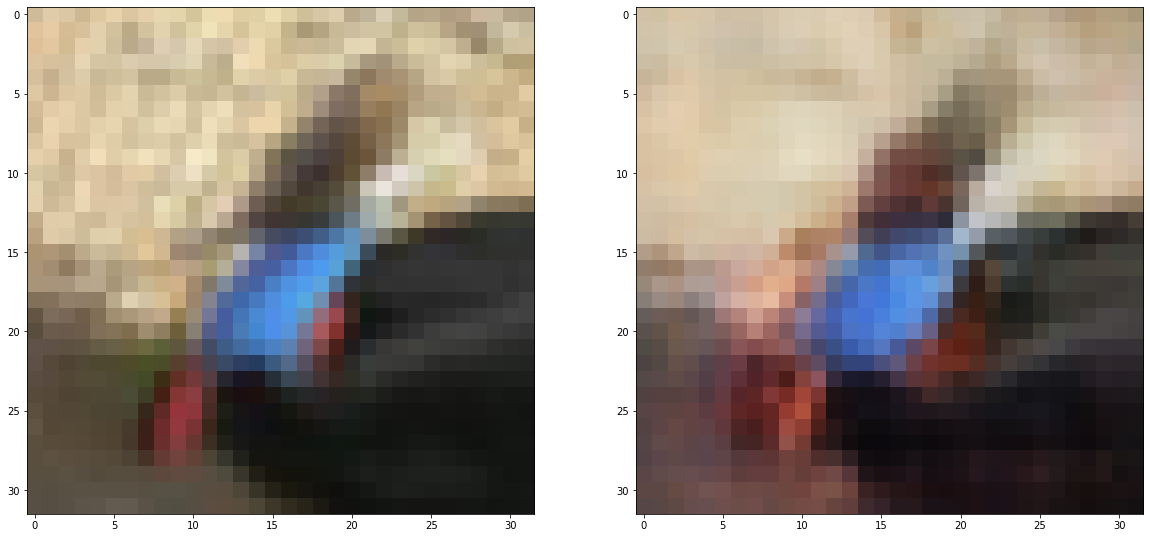

[4/9][4000/9137]	Loss_D: 1.3762	Loss_G: 1.0760	Loss_E: 1.0597	D(x): 0.5777	D(G(z)): 0.5654 / 0.5297


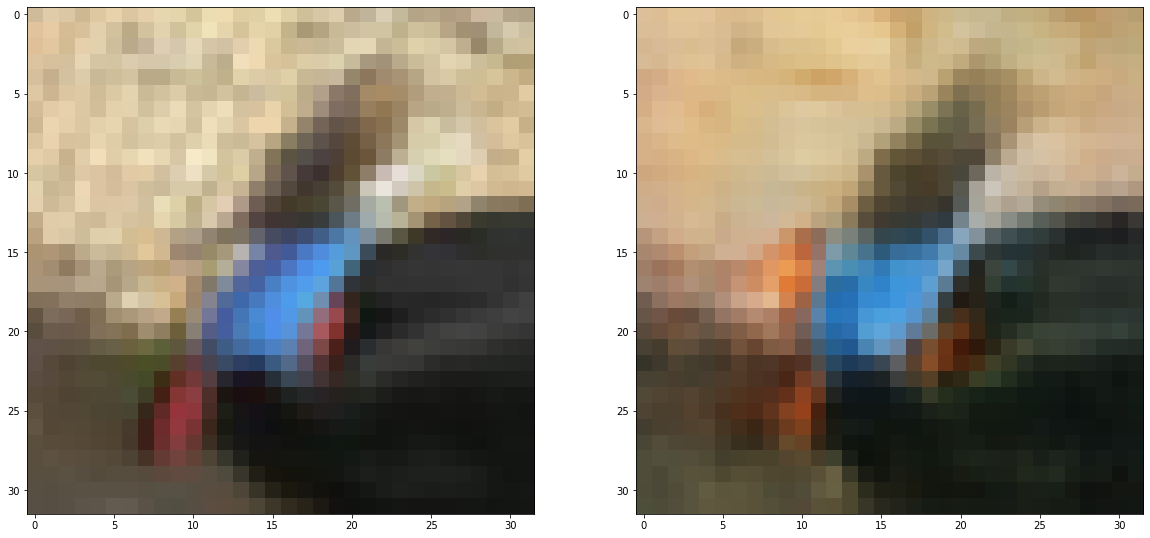

[4/9][6000/9137]	Loss_D: 1.3450	Loss_G: 1.0123	Loss_E: 0.9900	D(x): 0.5147	D(G(z)): 0.4861 / 0.4797


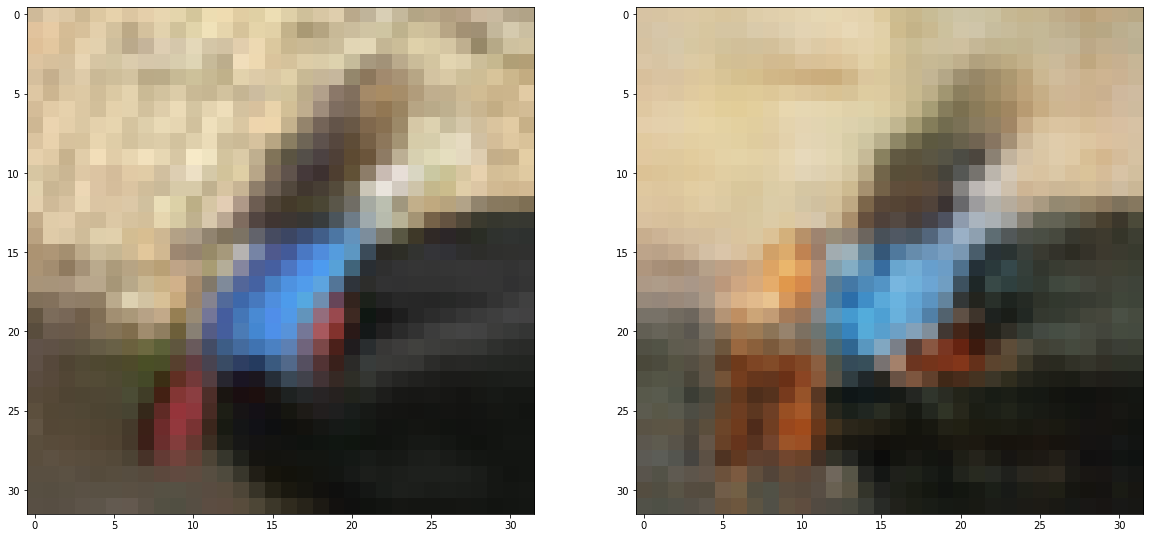

[4/9][8000/9137]	Loss_D: 1.3855	Loss_G: 1.0717	Loss_E: 1.0755	D(x): 0.5334	D(G(z)): 0.5227 / 0.5252


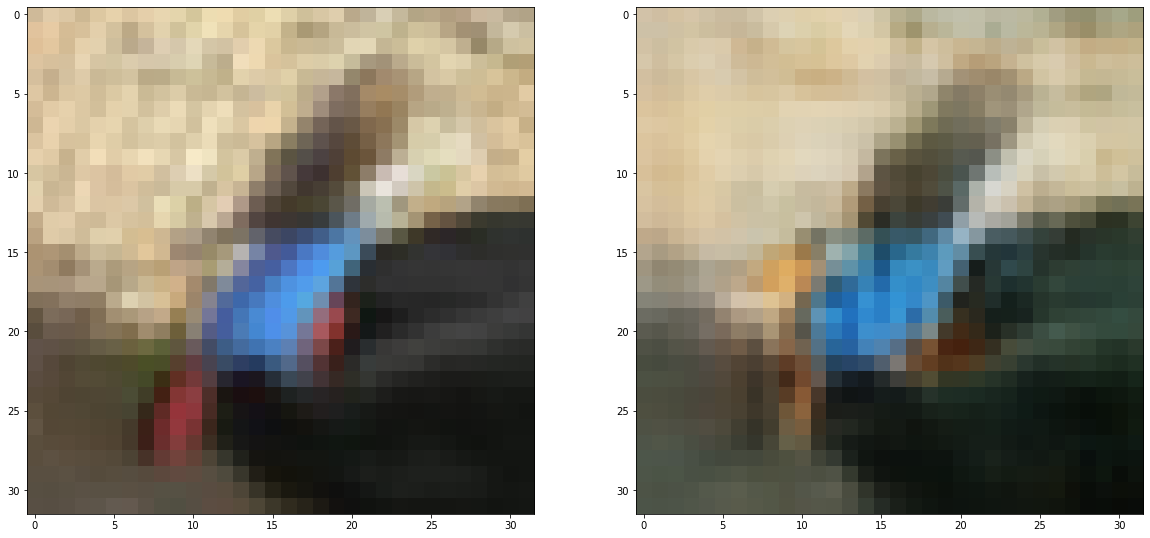

[5/9][0/9137]	Loss_D: 1.4536	Loss_G: 0.9857	Loss_E: 0.9694	D(x): 0.4602	D(G(z)): 0.4949 / 0.4634


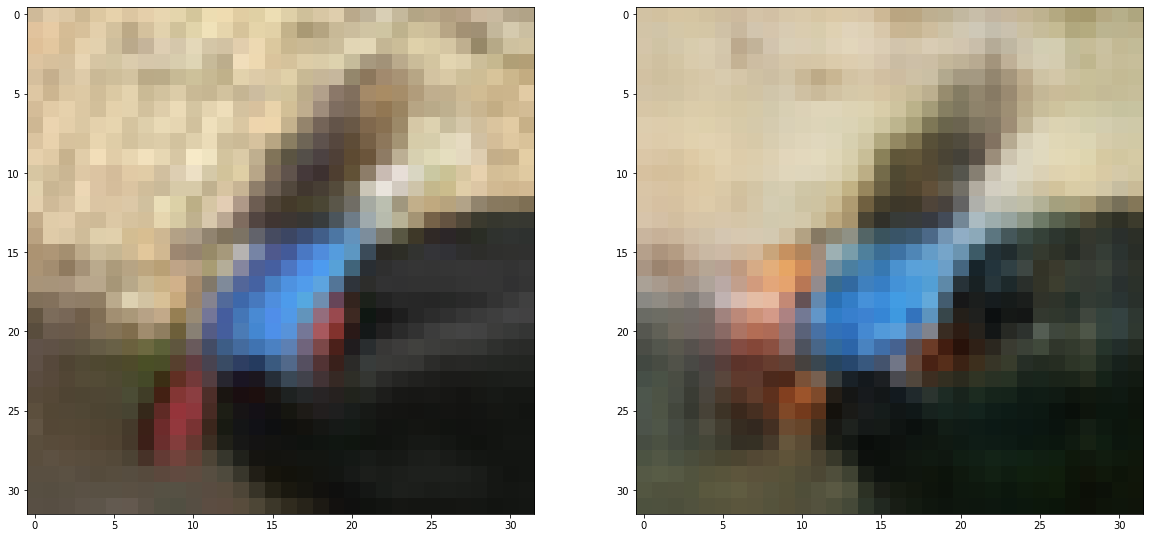

[5/9][2000/9137]	Loss_D: 1.3624	Loss_G: 1.1374	Loss_E: 1.1286	D(x): 0.5273	D(G(z)): 0.5117 / 0.4987


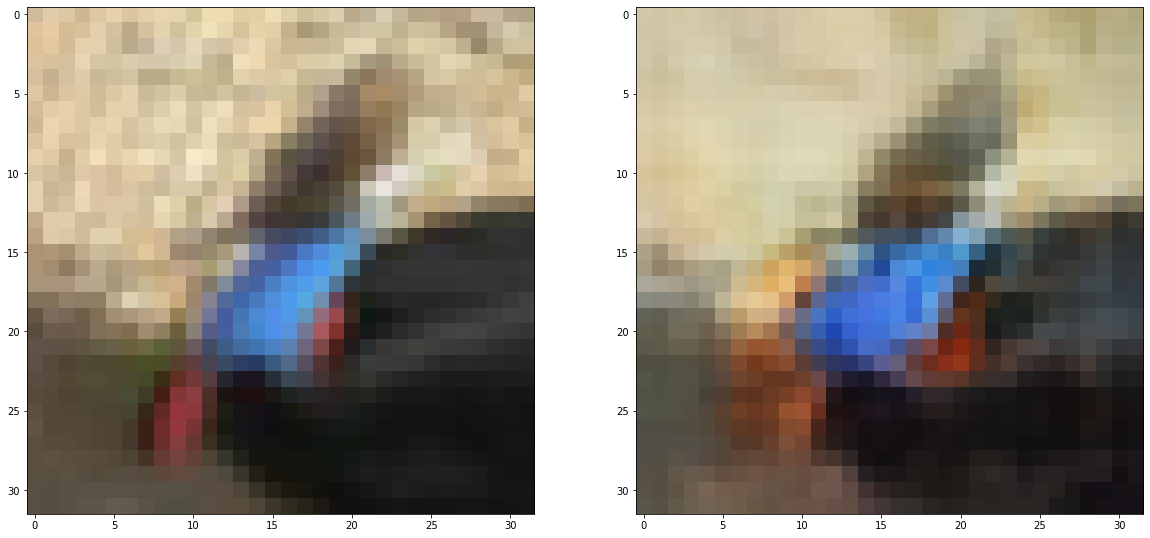

[5/9][4000/9137]	Loss_D: 1.3882	Loss_G: 1.1058	Loss_E: 1.0942	D(x): 0.4942	D(G(z)): 0.4939 / 0.4909


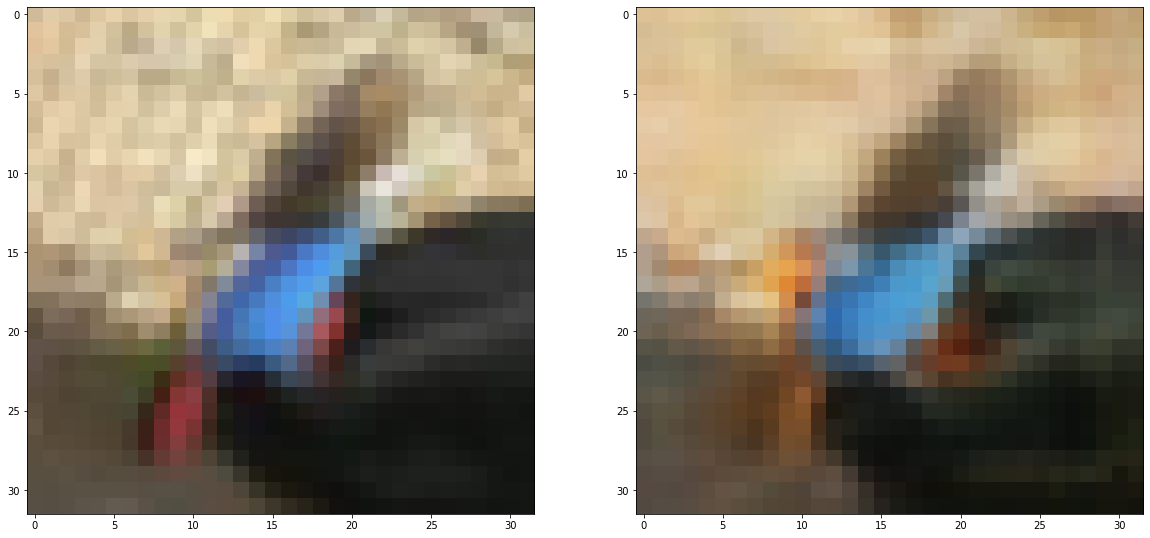

[5/9][6000/9137]	Loss_D: 1.3568	Loss_G: 1.0222	Loss_E: 1.0213	D(x): 0.4992	D(G(z)): 0.4842 / 0.4697


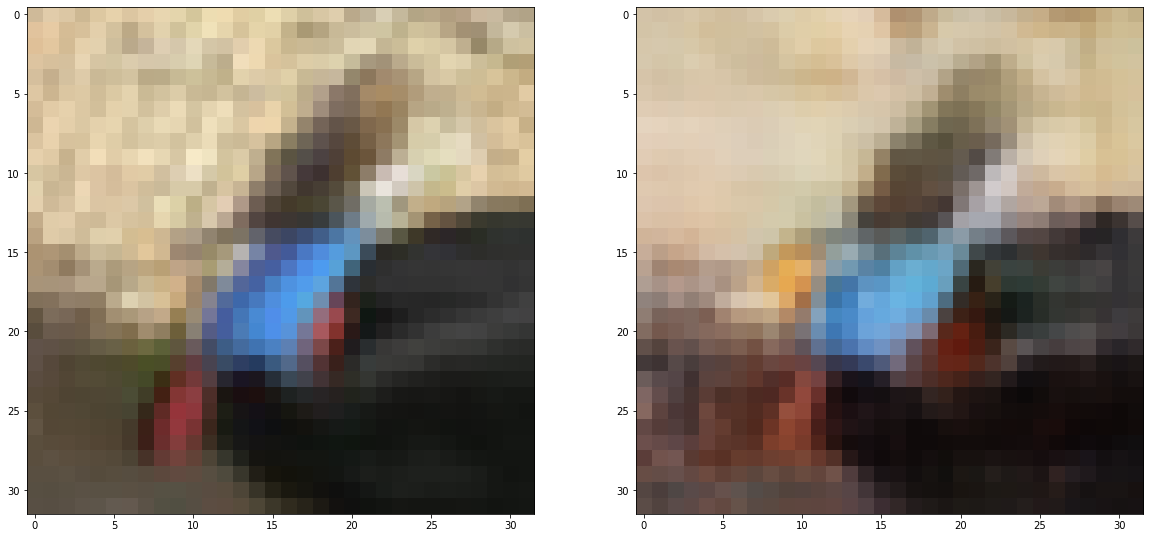

[5/9][8000/9137]	Loss_D: 1.3890	Loss_G: 1.1119	Loss_E: 1.1035	D(x): 0.5142	D(G(z)): 0.5175 / 0.5104


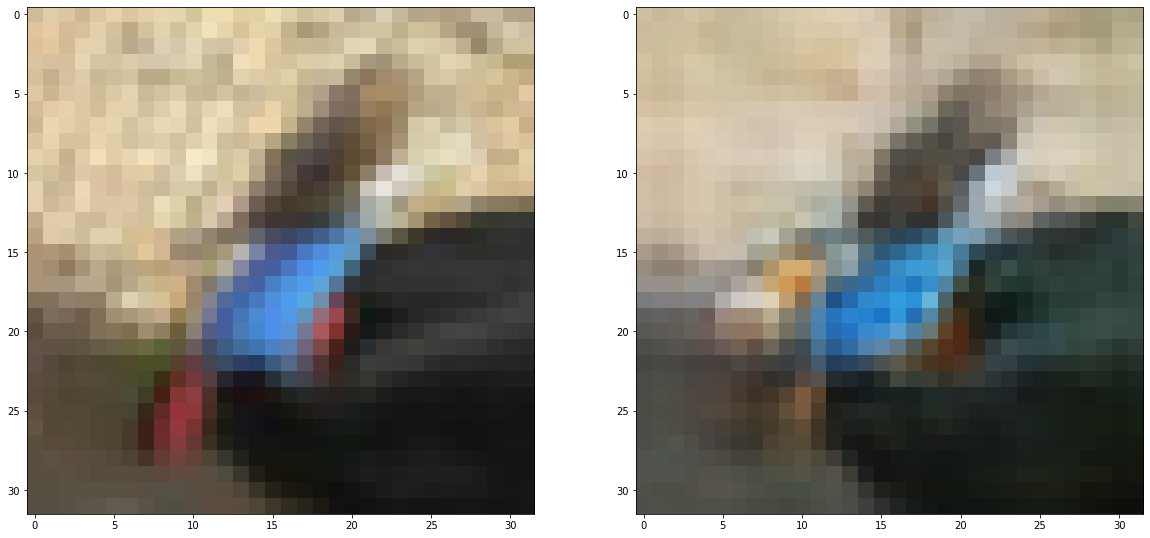

[6/9][0/9137]	Loss_D: 1.3650	Loss_G: 0.9332	Loss_E: 0.9535	D(x): 0.4984	D(G(z)): 0.4871 / 0.4954


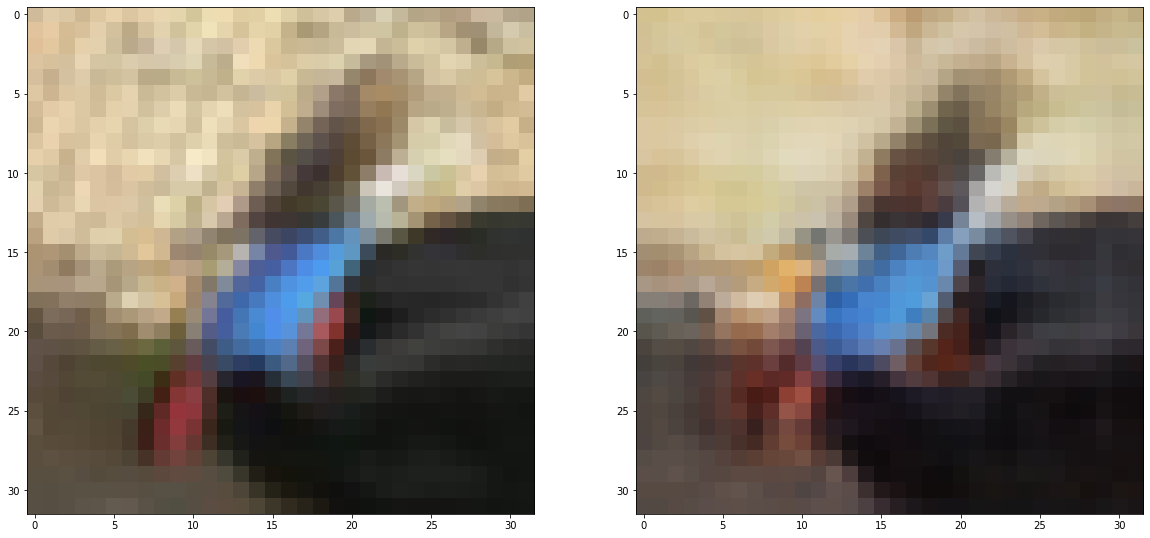

[6/9][2000/9137]	Loss_D: 1.3317	Loss_G: 1.0434	Loss_E: 1.0262	D(x): 0.5414	D(G(z)): 0.5079 / 0.5122


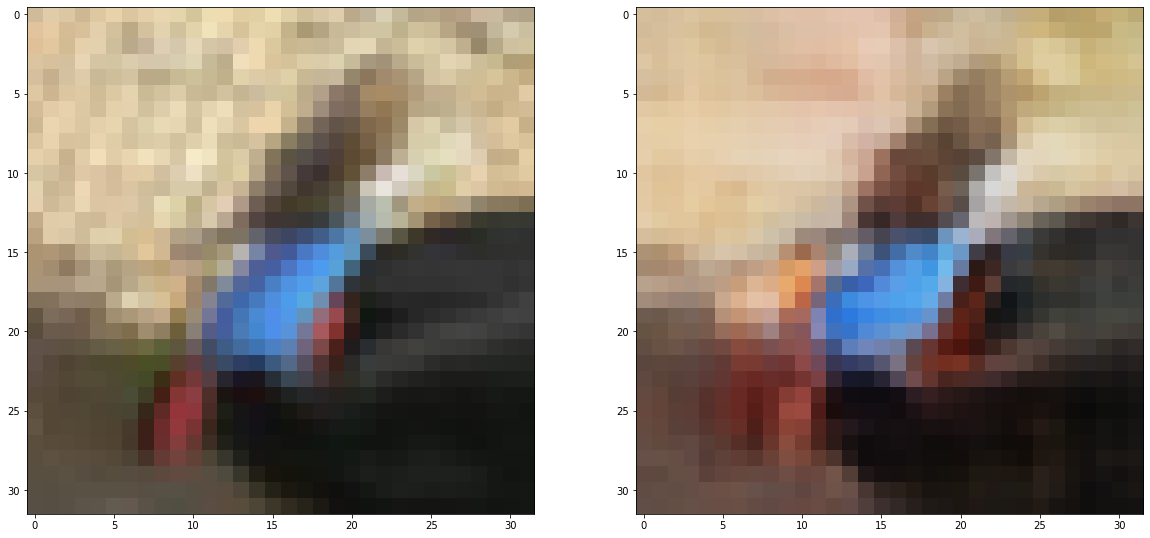

[6/9][4000/9137]	Loss_D: 1.3718	Loss_G: 0.9874	Loss_E: 1.0464	D(x): 0.5132	D(G(z)): 0.5067 / 0.5403


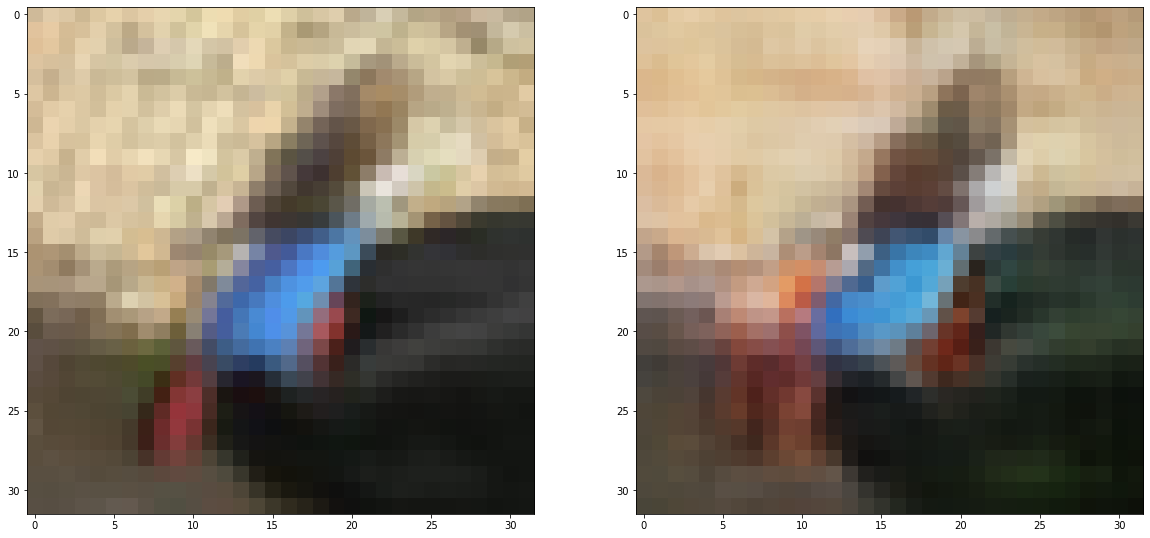

[6/9][6000/9137]	Loss_D: 1.3895	Loss_G: 0.9764	Loss_E: 0.9856	D(x): 0.4822	D(G(z)): 0.4767 / 0.4857


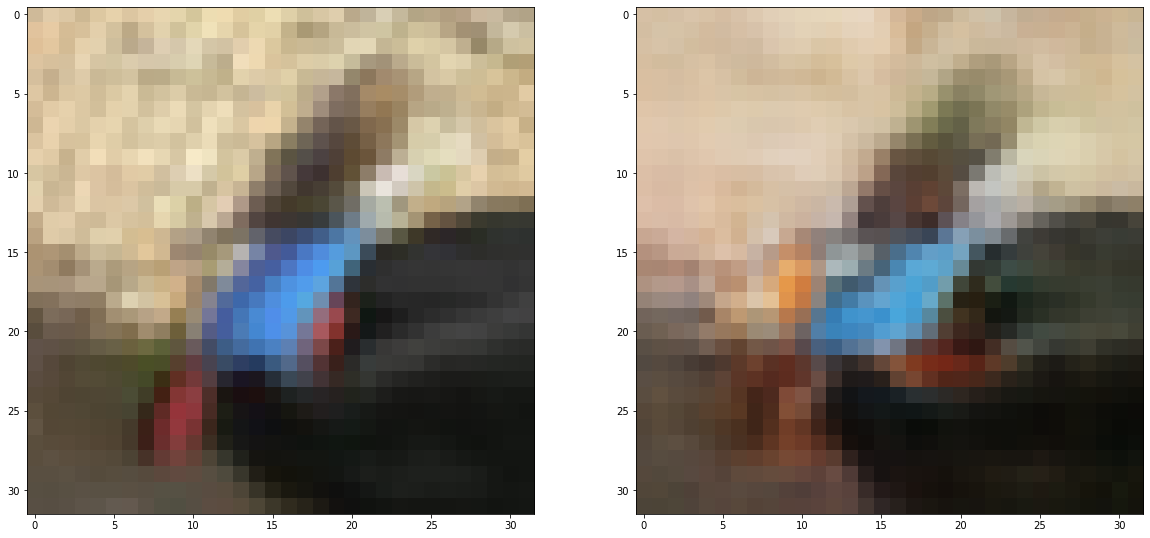

[6/9][8000/9137]	Loss_D: 1.3711	Loss_G: 1.0684	Loss_E: 1.0581	D(x): 0.5193	D(G(z)): 0.5094 / 0.5002


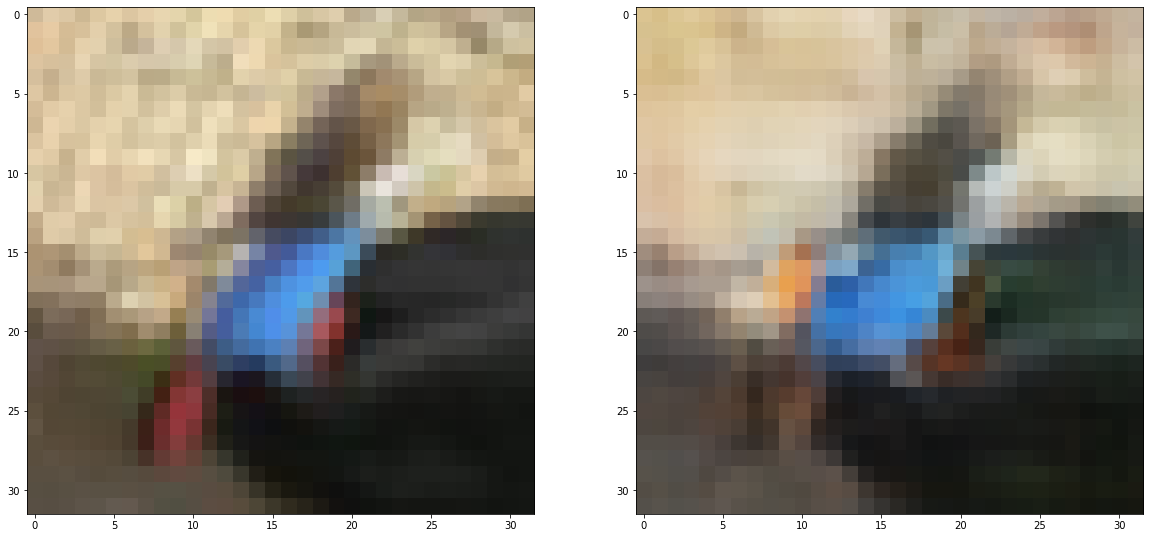

[7/9][0/9137]	Loss_D: 1.3841	Loss_G: 0.9296	Loss_E: 0.9341	D(x): 0.4896	D(G(z)): 0.4899 / 0.4843


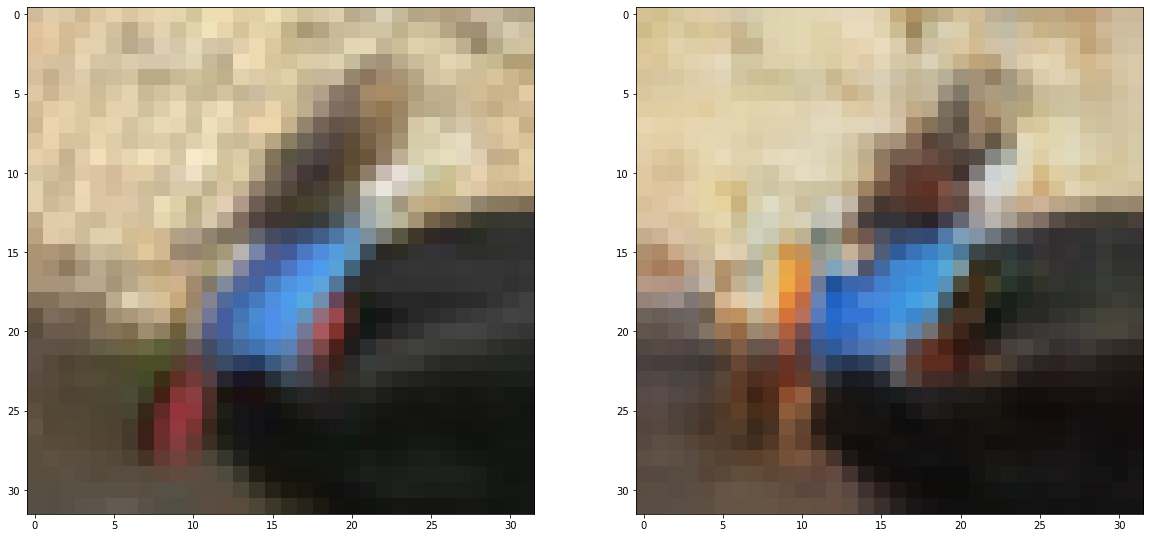

[7/9][2000/9137]	Loss_D: 1.3200	Loss_G: 1.0731	Loss_E: 1.0757	D(x): 0.5474	D(G(z)): 0.5053 / 0.5061


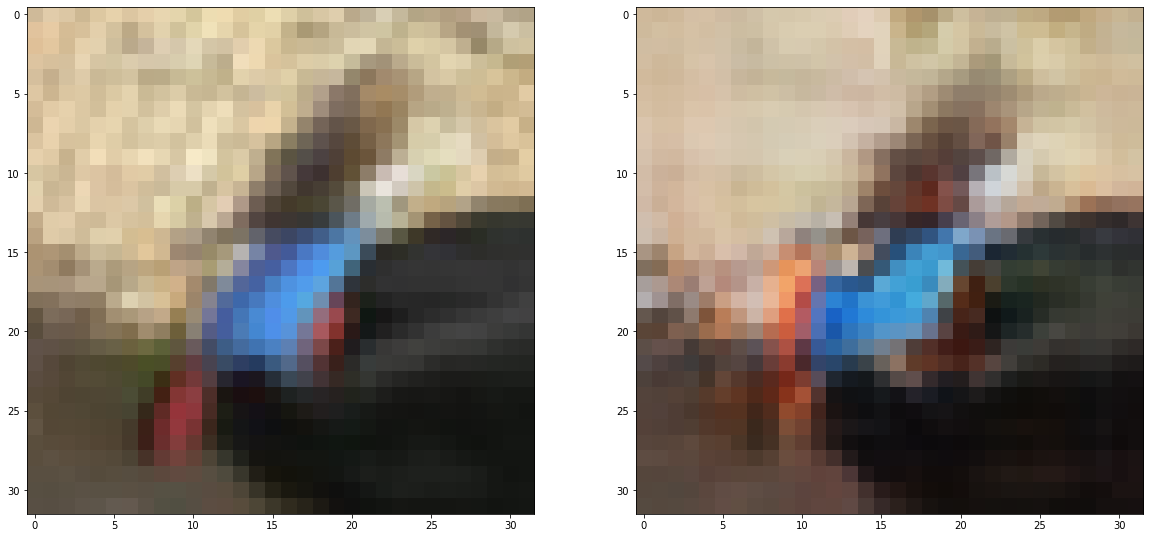

[7/9][4000/9137]	Loss_D: 1.3773	Loss_G: 0.9924	Loss_E: 1.0050	D(x): 0.5289	D(G(z)): 0.5278 / 0.5352


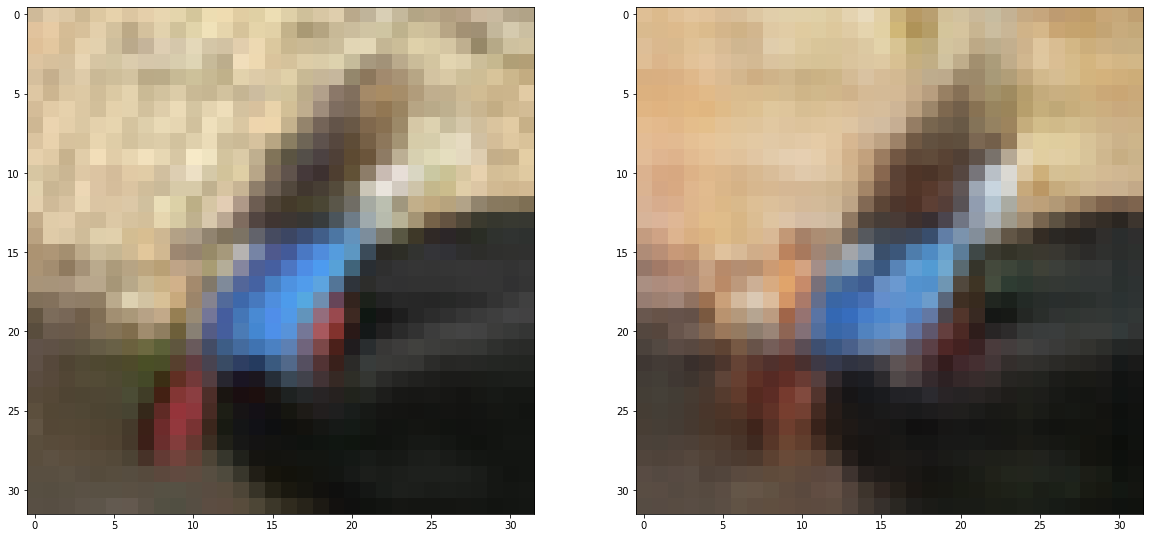

[7/9][6000/9137]	Loss_D: 1.3310	Loss_G: 0.9359	Loss_E: 0.9114	D(x): 0.5263	D(G(z)): 0.4933 / 0.5072


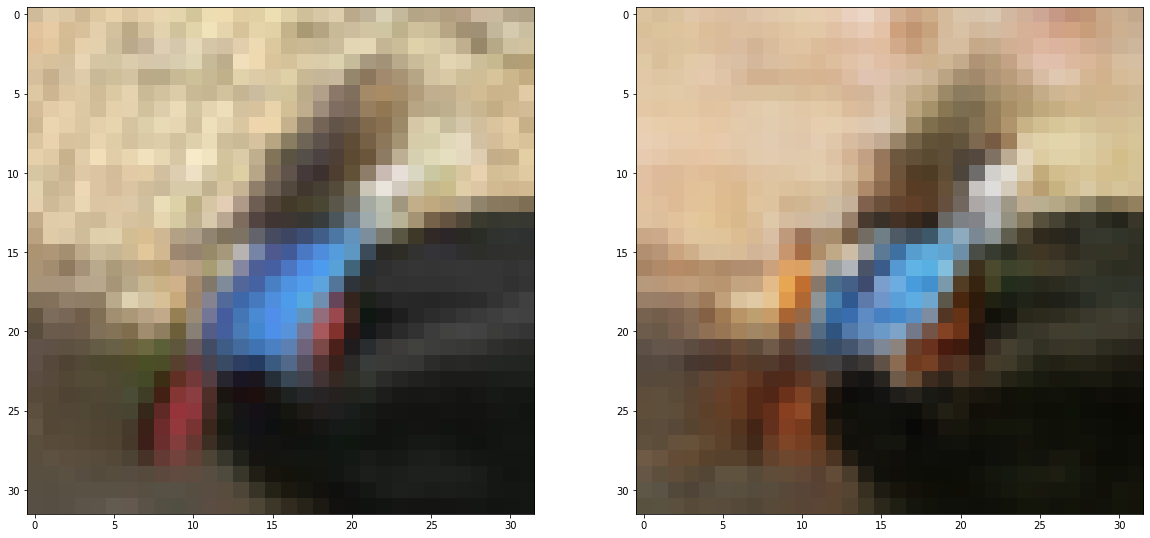

[7/9][8000/9137]	Loss_D: 1.3556	Loss_G: 1.0996	Loss_E: 1.0964	D(x): 0.5224	D(G(z)): 0.5077 / 0.4903


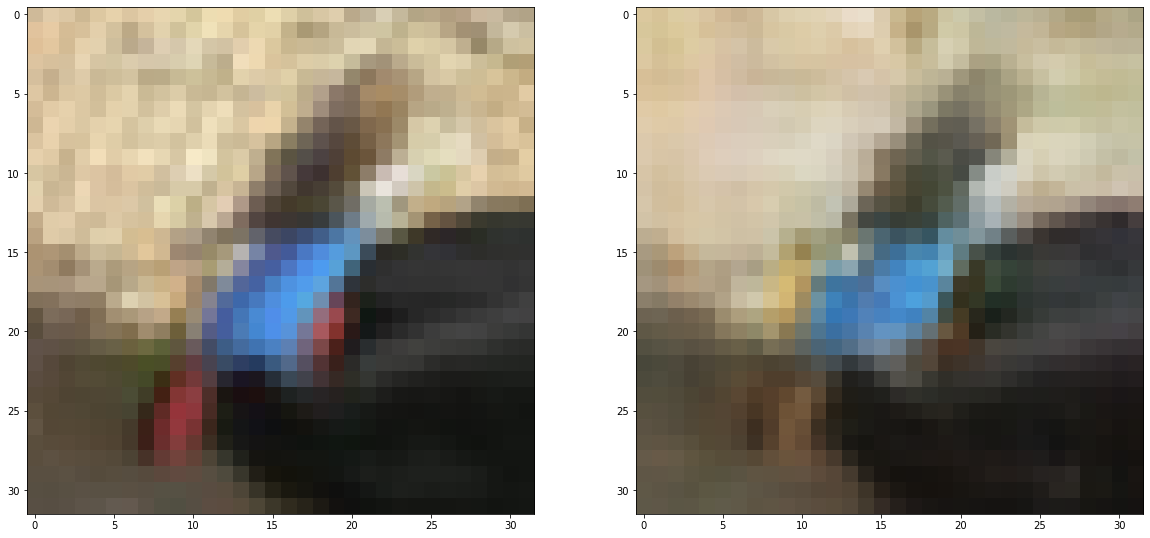

[8/9][0/9137]	Loss_D: 1.3933	Loss_G: 0.9263	Loss_E: 0.9230	D(x): 0.4943	D(G(z)): 0.4976 / 0.4866


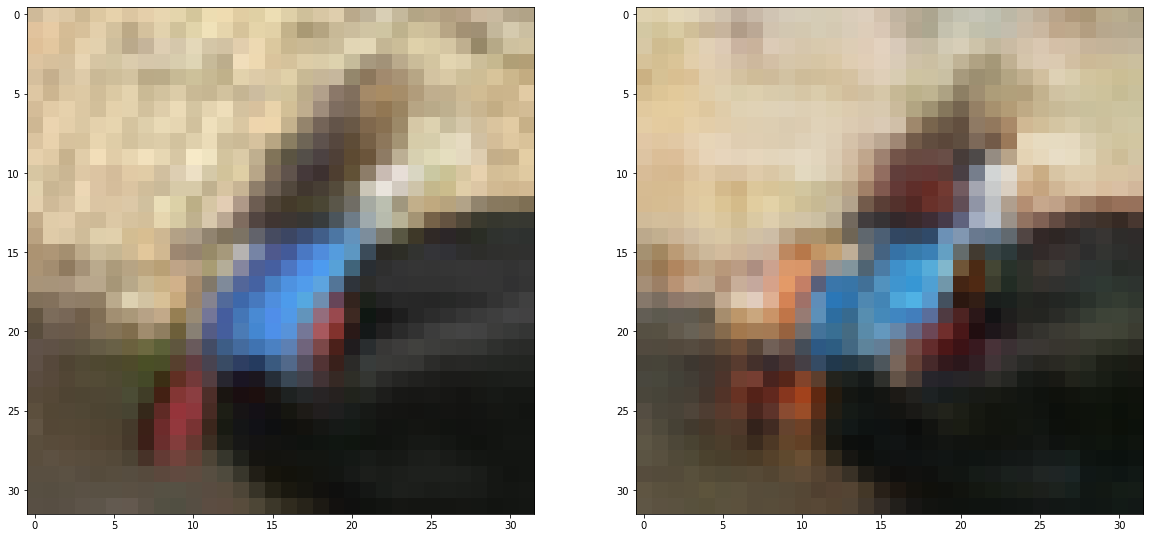

[8/9][2000/9137]	Loss_D: 1.3835	Loss_G: 1.0912	Loss_E: 1.0944	D(x): 0.5109	D(G(z)): 0.5112 / 0.5033


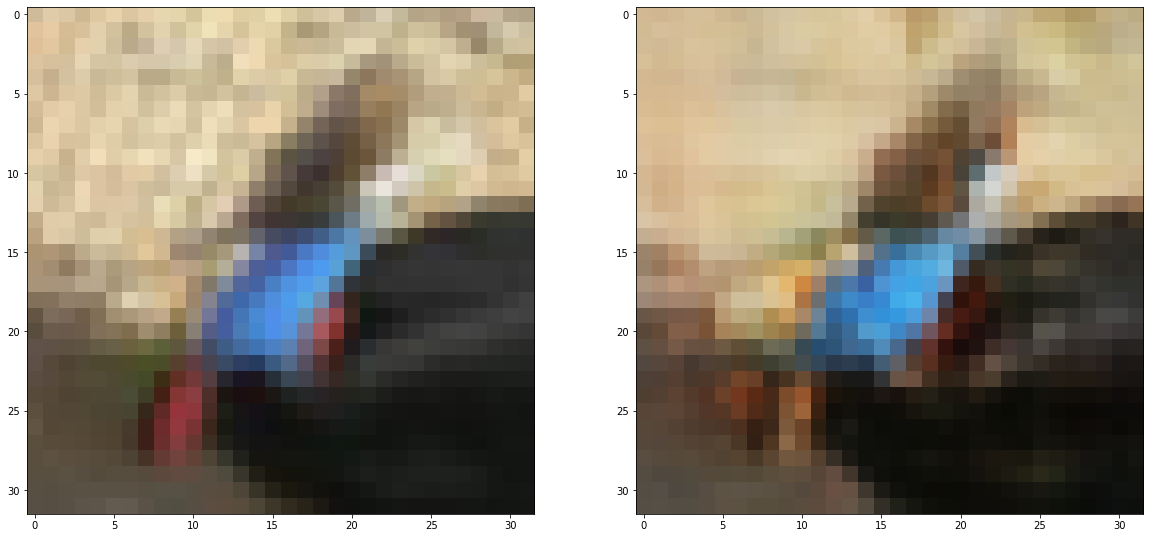

[8/9][4000/9137]	Loss_D: 1.3867	Loss_G: 1.1272	Loss_E: 1.1292	D(x): 0.4775	D(G(z)): 0.4793 / 0.4680


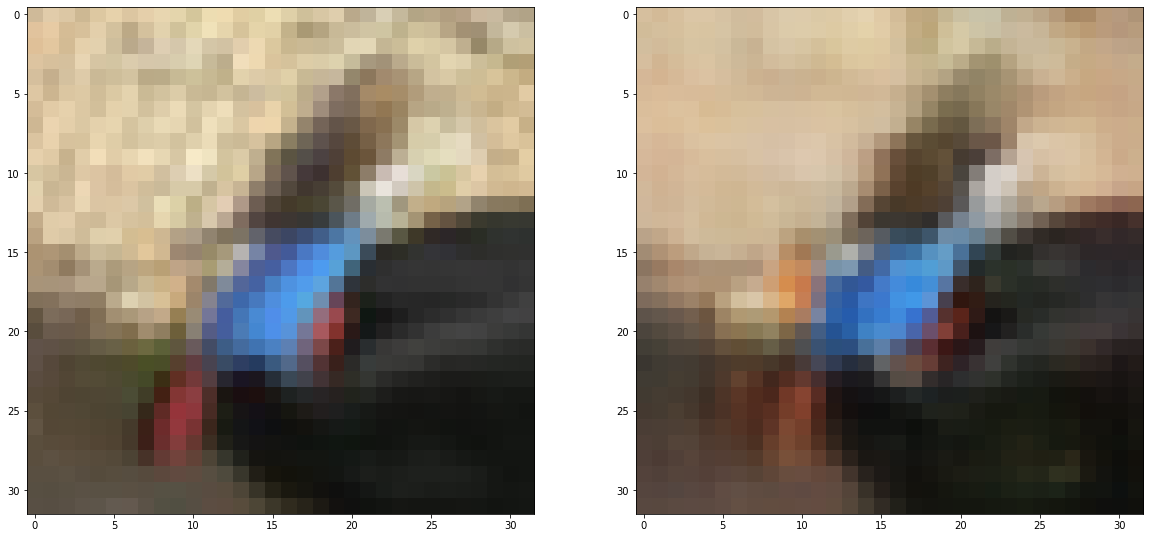

[8/9][6000/9137]	Loss_D: 1.3878	Loss_G: 0.9339	Loss_E: 0.9339	D(x): 0.4922	D(G(z)): 0.4922 / 0.4934


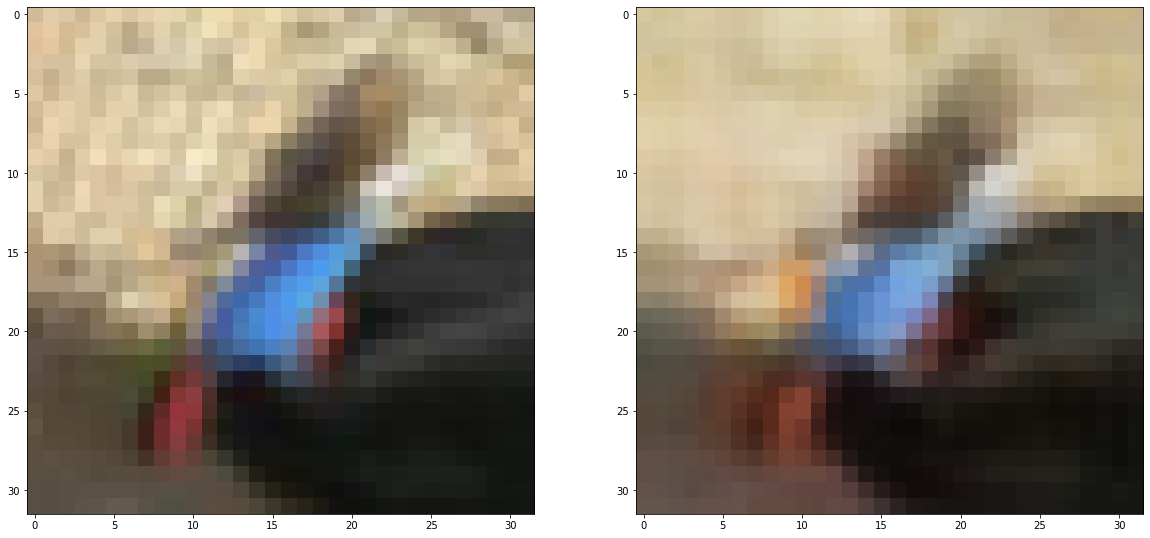

[8/9][8000/9137]	Loss_D: 1.3855	Loss_G: 0.9983	Loss_E: 0.9997	D(x): 0.5084	D(G(z)): 0.5084 / 0.5086


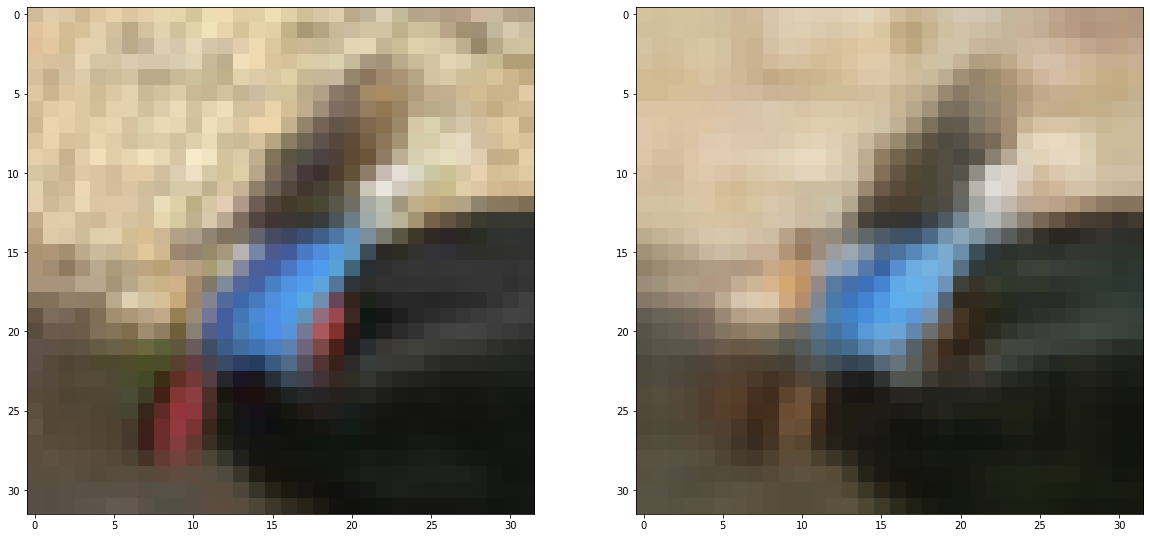

KeyboardInterrupt: ignored

In [11]:

for clus in range(1):
  x= x_clusters[clus]
  valid_ratio = 0.8
  class ImageData(Dataset):
    def __init__(self,is_train=True):
        self.is_train = is_train
        self.transform = transforms.Compose([transforms.ToTensor(),])
        self.train_index = int(valid_ratio * len(x))
        self.crop = transforms.CenterCrop((32,32))
    def __len__(self):
        if self.is_train:
            return self.train_index
        else:
            return len(x) - self.train_index -1
    def __getitem__(self, index):
        if not self.is_train:
            index = self.train_index + index
#         print("hey  "*4 + str(index))
        img = x[index]
        img = self.crop(TF.to_pil_image(img))
        img = self.transform(img)
        img = (img-0.5) /0.5
#         img = (img - 255.0) / 255.0
        return img
      
  batch_size=1

  device = 'cuda'
  dataset = ImageData()
  dataloader = DataLoader(dataset , batch_size = batch_size , shuffle=False)

  # custom weights initialization called on netG and netD
  def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
  
  IMG_WIDTH = 32
  IMG_HEIGHT = 32
  latent_size = 200

  num_channels_in_encoder = 8

  # Encoder Model
  class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        
        # ENCODER

        # 64x64x64
        self.e_conv_1 = nn.Sequential(
            nn.ZeroPad2d((1, 2, 1, 2)),
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(5, 5), stride=(2, 2)),nn.LeakyReLU()
        )

        # 128x32x32
        self.e_conv_2 = nn.Sequential(
            nn.ZeroPad2d((1, 2, 1, 2)),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(5, 5), stride=(2, 2)),
            nn.LeakyReLU()
        )
        
        # 128x32x32
        self.e_block_1 = nn.Sequential(
            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1)),
            nn.LeakyReLU(),
            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1)),
        )

        # 128x32x32
        self.e_block_2 = nn.Sequential(
            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1)),
            nn.LeakyReLU(),
            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1)),
        )

        # 128x32x32
        self.e_block_3 = nn.Sequential(
            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1)),
            nn.LeakyReLU(),

            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1)),
        )

        # 32x32x32
        self.e_conv_3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=num_channels_in_encoder, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
            nn.Tanh()
        )
    def forward(self, x):
      # print(x.shape)
      ec1 = self.e_conv_1(x)
      # print(ec1.shape)
      ec2 = self.e_conv_2(ec1)
      # print(ec2.shape)
      eblock1 = self.e_block_1(ec2) + ec2
      # print(eblock1.shape)
      eblock2 = self.e_block_2(eblock1) + eblock1
      # print(eblock2.shape)
      eblock3 = self.e_block_3(eblock2) + eblock2
      # print(eblock3.shape)
      ec3 = self.e_conv_3(eblock3)  # in [-1, 1] from tanh activation
      return ec3
  
  netE = Encoder().to(device)
  netE.apply(weights_init)
  inp = torch.randn(IMG_WIDTH*IMG_HEIGHT*3 * 100)
  inp = inp.view((-1,3,IMG_HEIGHT,IMG_WIDTH))
  output = netE(inp.to(device))

  class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        # DECODER
#         self.latent_fc1 = nn.Sequential(
#             nn.Linear(latent_size,1000),
#             nn.Sigmoid(),
#         )
#         self.latent_fc2 = nn.Sequential(
#             nn.Linear(1000,54*44),
#             nn.Sigmoid(),
#         )
        # 128x64x64
        self.d_up_conv_1 = nn.Sequential(
        nn.Conv2d(in_channels=num_channels_in_encoder, out_channels=64, kernel_size=(3, 3), stride=(1, 1)),
            nn.LeakyReLU(),

            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.ConvTranspose2d(in_channels=64, out_channels=128, kernel_size=(2, 2), stride=(2, 2))
        )

        # 128x64x64
        self.d_block_1 = nn.Sequential(
            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1)),
            nn.LeakyReLU(),

            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1)),
        )

        # 128x64x64
        self.d_block_2 = nn.Sequential(
            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1)),
            nn.LeakyReLU(),

            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1)),
        )

        # 128x64x64
        self.d_block_3 = nn.Sequential(
            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1)),
            nn.LeakyReLU(),

            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1)),
        )

        # 256x128x128
        self.d_up_conv_2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=32, kernel_size=(3, 3), stride=(1, 1)),
            nn.LeakyReLU(),

            nn.ZeroPad2d((1, 1, 1, 1)),
            nn.ConvTranspose2d(in_channels=32, out_channels=256, kernel_size=(2, 2), stride=(2, 2))
        )

        # 3x128x128
        self.d_up_conv_3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=16, kernel_size=(3, 3), stride=(1, 1)),
            nn.LeakyReLU(),
            nn.ReflectionPad2d((3, 3, 3, 3)),
            nn.Conv2d(in_channels=16, out_channels=3, kernel_size=(5, 5), stride=(1, 1)),
            nn.Tanh()
        )

        
        
    def forward(self, x):
        # print(x.shape)
        uc1 = self.d_up_conv_1(x)
        # print(uc1.shape)
        dblock1 = self.d_block_1(uc1) + uc1
        # print(dblock1.shape)
        dblock2 = self.d_block_2(dblock1) + dblock1
        # print(dblock2.shape)
        dblock3 = self.d_block_3(dblock2) + dblock2
        # print(dblock3.shape)
        uc2 = self.d_up_conv_2(dblock3)
        # print(uc2.shape)
        dec = self.d_up_conv_3(uc2)
        # print(dec.shape)
        return dec
  
  netG = Generator().to(device)
  netG.apply(weights_init)
  inp = torch.randn(100*num_channels_in_encoder*8*8).view((-1,num_channels_in_encoder,8,8)).to(device)
  output = netG(inp)

  class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.latent_layer1 = nn.Sequential(
            nn.ConvTranspose2d(num_channels_in_encoder, 12, (3,3), stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1),
            nn.LeakyReLU(negative_slope=0.2),
        )
        self.latent_layer2 = nn.Sequential(
            nn.ConvTranspose2d(12, 16, (3,3), stride=1, padding=2, output_padding=0, groups=1, bias=True, dilation=1),
            nn.LeakyReLU(negative_slope=0.2),
        )
        self.latent_layer3 = nn.Sequential(
            nn.ConvTranspose2d(16, 24, (3,3), stride=2, padding=2, output_padding=1, groups=1, bias=True, dilation=1),
            nn.LeakyReLU(negative_slope=0.2),
        )
        self.latent_layer4 = nn.Sequential(
            nn.ConvTranspose2d(24, 36, (5,5), stride=2, padding=0, output_padding=1, groups=1, bias=True, dilation=1),
            nn.LeakyReLU(negative_slope=0.2),
        )
        self.latent_layer5 = nn.Sequential(
            nn.ConvTranspose2d(36, 3, (1,1), stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Tanh(),
        )

        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=64, kernel_size=3,stride = 1,padding=0),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(0.3),
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5,stride = 2,padding=0),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(0.3),
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=32, kernel_size=3,stride = 2,padding=2),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(0.3),
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3,stride = 1,padding=2),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(0.3),
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3,stride = 1,padding=0),
            nn.LeakyReLU(negative_slope=0.2),
            nn.Dropout(0.3),
            nn.Tanh(),
        )
        
        
        self.fc1 = nn.Sequential(
            nn.Linear(512,2000),
            nn.Sigmoid(),
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(2000,100),
            nn.Sigmoid(),
        )
        self.fc3 = nn.Sequential(
            nn.Linear(100,1),
            nn.Sigmoid(),
        )


    def forward(self, x):
        y = x['encoded'].to(device)
        y = self.latent_layer1(y)
        # print(y.shape)
        y = self.latent_layer2(y)
        # print(y.shape)
        y = self.latent_layer3(y)
        # print(y.shape)
        y = self.latent_layer4(y)
        # print(y.shape)
        y = self.latent_layer5(y)
        # print(y.shape)
#         print(y.shape)
        x = x['img'].to(device)
        # print(x.shape , y.shape)
        x = torch.cat((x,y),1)
        # print(x.shape)
        x = self.layer1(x)
        # print(x.shape)
        x = self.layer2(x)
        # print(x.shape)
        x = self.layer3(x)
        # print(x.shape)
        x = self.layer4(x)
        # print(x.shape)
        x = self.layer5(x)
        # print(x.shape)
        # print("COmes here")
#         print(x.shape)
        x= x.reshape((x.shape[0],-1))
        # print(x.shape)
        x = self.fc1(x)
        # print(x.shape)
        x = self.fc2(x)
        # print(x.shape)
        x = self.fc3(x)
        # print(x.shape)
        # print("Here as well")
        return x
  
  netD = Discriminator().to(device)
  netD.apply(weights_init)
  inp_x = {}
  inp_x['img']=torch.randn(IMG_WIDTH*IMG_HEIGHT*3 * 100).view((-1,3,IMG_HEIGHT,IMG_WIDTH))
  inp_x['encoded'] = torch.randn(100*num_channels_in_encoder*8*8).view((-1,num_channels_in_encoder,8,8))
  output = netD(inp_x)

  lr = 0.0002
# Initialize BCELoss function
  criterion = nn.BCELoss()
  msecriterion = nn.MSELoss()
  l1criterion = nn.L1Loss()
  # Establish convention for real and fake labels during training
  real_label = 1
  fake_label = 0

# Setup Adam optimizers for both G and D
  optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(0.5, 0.999))
  optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(0.5, 0.999))
  optimizerE = optim.Adam(netE.parameters(), lr=lr, betas=(0.5, 0.999))

  valid_dataset = ImageData(is_train=False)
  num_images_to_show = 1
  valid_dataloader = DataLoader(valid_dataset, batch_size=num_images_to_show, shuffle=True)
  valid_batch = next(iter(valid_dataloader)).to(device)

  G_losses = []
  D_losses = []
  E_losses = []
  iters = 0
  num_epochs = 9

  print("Starting Training Loop...")
# For each epoch
  for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, (images) in enumerate(dataloader, 0):
        netG.train()
        netD.train()
        netE.train()
        
        netD.zero_grad()
        
        images = images.to(device)
        fake_images = netG(netE(images))
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        
        ## Create a fake pair batch --

        inp_x = {}
        inp_x['img']=images
        inp_x['encoded'] = netE(images)
        
#         label = torch.full((images.size(0),), real_label, device=device)
        label = torch.FloatTensor(np.random.uniform(low=0.855, high=0.999, size=(images.size(0)))).to(device)
        output = netD(inp_x).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward(retain_graph=True)
        D_x = output.mean().item()
        
        inp_x_fake = {}
        inp_x_fake['img']=fake_images
        inp_x_fake['encoded'] = netE(images)
        label = torch.FloatTensor(np.random.uniform(low=0.005, high=0.155, size=(images.size(0)))).to(device)
#         label.fill_(fake_label)
        output = netD(inp_x_fake).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward(retain_graph=True)
        D_G_z1 = output.mean().item()
        
        errD = errD_real + errD_fake
        
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        inp_x_fake = {}
        inp_x_fake['img']=fake_images
        inp_x_fake['encoded'] = netE(images)

        label = torch.FloatTensor(np.random.uniform(low=0.895, high=0.999, size=(images.size(0)))).to(device)
#         label.fill_(real_label)
        output = netD(inp_x_fake).view(-1)
        
        errG = criterion(output, label) + 4*l1criterion(images,fake_images)
        errG.backward(retain_graph=True)
        D_G_z2 = output.mean().item()
        optimizerG.step()

        
        netE.zero_grad()
        inp_x_fake = {}
        inp_x_fake['img']=fake_images
        inp_x_fake['encoded'] = netE(images)
        
        label = torch.FloatTensor(np.random.uniform(low=0.895, high=0.999, size=(images.size(0)))).to(device)
        output = netD(inp_x_fake).view(-1)

        errE = criterion(output, label) + 4*l1criterion(images,fake_images)
        errE.backward(retain_graph=True)
        E_G_z2 = output.mean().item()
        optimizerE.step()
        
        #################################_______STATS________###########################################

        # Output training stats
        if i % 2000 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tLoss_E: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(),errE.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        E_losses.append(errE.item())
        
        # Check how the generator is doing by saving G's output on fixed_noise
#         if (iters % 50 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
#             netG.eval()
#             with torch.no_grad():
#                 fake = netG(fixed_noise).detach().cpu()
#                 fake[:] = fake[:]*0.5 + 0.5
#             img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
        del images
        del inp_x_fake
        del inp_x
        del label
        del output
        torch.cuda.empty_cache()
        iters += 1

        if i%2000 ==0:
            netE.eval()
            netG.eval()
            encoded_img = netE(valid_batch)
            reconstructed_img = netG(encoded_img)
            f, axarr = plt.subplots(num_images_to_show,2)
            for i in range(num_images_to_show):
                validimg = (valid_batch[i].cpu().detach().permute(1, 2, 0) * 0.5) + 0.5
                rec_img = (reconstructed_img[i].cpu().detach().permute(1, 2, 0) *0.5 ) + 0.5
                axarr[0].imshow(validimg)
                axarr[1].imshow(rec_img)
                f.set_figheight(20)
                f.set_figwidth(20)
            plt.show()

